In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

%load_ext autoreload
%autoreload 2
from utils import show_heat_map, print_mutual_info, aggregate_data, resample_df, load_big_df
from utils import two_sig_signal, two_sig_signal_multi, get_yulu_df, nice_hist_series, plot_box_plot
from utils import plot_box_plot_a

from lin_regr_utils import lin_regr, linearity_test, residual_independence_test, homoscedasticity_test, residual_normality_test
from lin_regr_utils import multicollinearity_test, get_stats

In [4]:
# df_raw = pd.read_csv("../simulation_data/output_2025-04-08_20250401_USUALUSDTOB500_USUALUSDTtrades_PL.csv")
# df_raw = pd.read_csv("../simulation_data/output_2025-04-09_20250402_USUALUSDTOB500_USUALUSDTtrades_ID.csv")
# df_raw = pd.read_csv("../simulation_data/output_2025-04-09_20250407_PROSUSDTOB500_PROSUSDTtrades_UD.csv")
df_raw = pd.read_csv("../simulation_data/output_2025-04-10_20250408_NEARUSDTOB500_NEARUSDTtrades_QR.csv")

df_buy, df_sell, df_ob = aggregate_data(df_raw)
# df = resample_df(df_buy, df_sell, df_ob, '1T')
df_raw

,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price
0,2025-04-08 00:00:00.428999936,2.116,2.117,847.3,7163.6,NaN,NaN,NaN
1,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,75.0,2.117
2,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,183.6,2.117
3,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,672.6,2.117
4,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,1811.1,2.117
...,...,...,...,...,...,...,...,...
951587,2025-04-09 00:00:01.092999936,1.905,1.906,4798.5,11688.8,NaN,NaN,NaN
951588,2025-04-09 00:00:01.193000192,1.905,1.906,4798.5,11831.3,NaN,NaN,NaN
951589,2025-04-09 00:00:01.292999936,1.905,1.906,5923.5,6322.7,NaN,NaN,NaN
951590,2025-04-09 00:00:01.394000128,1.905,1.906,5923.5,7293.6,NaN,NaN,NaN


Average PnL: 14.912 bps
Pnl for 10M Volume: 14912.295
Volume: 1.22K
Holding (minutes): [median: 3.42] [mean: 8.04] [std: 11.84]


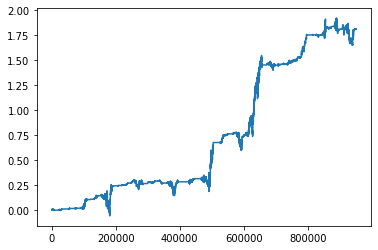

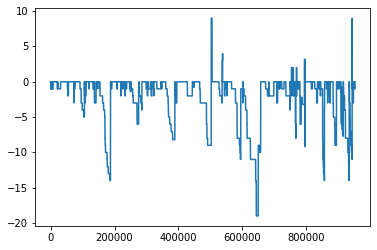

,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price,mid,past_3m_range,balance,tot_volume,position,exch_bids,exch_asks,exch_bids1,exch_asks1,pnl,pos_change
0,2025-04-08 00:00:00.428999936,2.116,2.117,847.3,7163.6,NaN,NaN,NaN,2.1165,0.000,0.0000,0.0000,0.0,"(None, 0)","(None, 0)","(None, 0)","(None, 0)",0.0000,1
1,2025-04-08 00:00:00.997600000,2.116,2.117,NaN,NaN,Buy,75.0,2.117,2.1165,0.000,0.0000,0.0000,0.0,"(2.115, 0)","(2.118, 0)","(2.115, 0)","(2.118, 1)",0.0000,0
2,2025-04-08 00:00:00.997600000,2.116,2.117,NaN,NaN,Buy,183.6,2.117,2.1165,0.000,0.0000,0.0000,0.0,"(2.115, 0)","(2.118, 0)","(2.115, 0)","(2.118, 1)",0.0000,0
3,2025-04-08 00:00:00.997600000,2.116,2.117,NaN,NaN,Buy,672.6,2.117,2.1165,0.000,0.0000,0.0000,0.0,"(2.115, 0)","(2.118, 0)","(2.115, 0)","(2.118, 1)",0.0000,0
4,2025-04-08 00:00:00.997600000,2.116,2.117,NaN,NaN,Buy,1811.1,2.117,2.1165,0.000,0.0000,0.0000,0.0,"(2.115, 0)","(2.118, 0)","(2.115, 0)","(2.118, 1)",0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951587,2025-04-09 00:00:01.092999936,1.905,1.906,4798.5,11688.8,NaN,NaN,NaN,1.9055,0.005,1.8148,1216.9824,0.0,"(1.9040000000000001, 0)","(1.9069999999999998, 0)","(1.9040000000000001, 0.0)","(1.9069999999999998, 1)",1.8148,0
951588,2025-04-09 00:00:01.193000192,1.905,1.906,4798.5,11831.3,NaN,NaN,NaN,1.9055,0.005,1.8148,1216.9824,0.0,"(1.9040000000000001, 0)","(1.9069999999999998, 0)","(1.9040000000000001, 0.0)","(1.9069999999999998, 1)",1.8148,0
951589,2025-04-09 00:00:01.292999936,1.905,1.906,5923.5,6322.7,NaN,NaN,NaN,1.9055,0.005,1.8148,1216.9824,0.0,"(1.9040000000000001, 0)","(1.9069999999999998, 0)","(1.9040000000000001, 0.0)","(1.9069999999999998, 1)",1.8148,0
951590,2025-04-09 00:00:01.394000128,1.905,1.906,5923.5,7293.6,NaN,NaN,NaN,1.9055,0.005,1.8148,1216.9824,0.0,"(1.9040000000000001, 0)","(1.9069999999999998, 0)","(1.9040000000000001, 0.0)","(1.9069999999999998, 1)",1.8148,0


In [323]:
class Queue:
    def __init__(self):
        self.list = []
        self.ptr = 0

    def push(self, x):
        self.list.append(x)
    
    def pop(self):
        ret = self.list[self.ptr]
        self.ptr += 1
        return ret
    
    def front(self):
        return self.list[self.ptr]
    
    def isEmpty(self):
        return len(self.list) <= self.ptr

class State:
    pass

def backtest(df_raw, get_new_price, params):
    MAX_POSITION = params['MAX_POSITION']
    ROUND_TRIP_LATENCY = params['ROUND_TRIP_LATENCY']
    MAKER_FEE_BPS = params['MAKER_FEE_BPS']
    TAKER_FEE_BPS = params['TAKER_FEE_BPS']
    MARKET_EXIT_TIME = params['MARKET_EXIT_TIME']
    HOLD_THRESH = params['HOLD_THRESH']
    SIZING_STRAT = params['SIZING_STRAT']
    SIZING_PARAMS = params['SIZING_PARAMS']
    TICK_SIZE = params['TICK_SIZE']

    balance = []
    position = []
    tot_volume = []

    exch_bids = []
    exch_asks = []
    exch_bids1 = []
    exch_asks1 = []

    state = State()

    state.curr_pos = 0
    state.curr_balance = 0

    state.last_enter_time = None

    order_queue = Queue() # (time, (bid_price, bid_qty), (ask_price, ask_qty), (bid_price1, bid_qty), (ask_price1, ask_qty))
    prev_bbid = None
    prev_bask = None

    exch_ask1 = (None, 0) # price, qty
    exch_ask = (None, 0) # price, qty
    exch_bid = (None, 0) # price, qty
    exch_bid1 = (None, 0) # price, qty

    def send_order(
        prices,
        curr_time, curr_position, order_queue
    ):  
        bid_price, ask_price, bid_aggr, ask_aggr = prices
        receive_time = curr_time + ROUND_TRIP_LATENCY

        SIZE_MULTIPLIER = 0.01
        if curr_position > 0:
            if SIZING_STRAT == 'SLOW':
                new_order = (receive_time, 
                    (bid_aggr, 0),
                    (ask_aggr, 0),
                    (bid_price, min(SIZING_PARAMS['enter'], MAX_POSITION - curr_position)), 
                    (ask_price, min(SIZING_PARAMS['exit'], abs(curr_position))))
            elif SIZING_STRAT == 'MAX':
                new_order = (receive_time, 
                    (bid_aggr, 0),
                    (ask_aggr, curr_position * 0.0),
                    (bid_price, (MAX_POSITION - curr_position) * SIZE_MULTIPLIER), 
                    (ask_price, MAX_POSITION * SIZE_MULTIPLIER))
        else:
            if SIZING_STRAT == 'SLOW':
                new_order = (receive_time, 
                    (bid_aggr, 0),
                    (ask_aggr, 0),
                    (bid_price, min(SIZING_PARAMS['exit'], abs(curr_position))),
                    (ask_price, min(SIZING_PARAMS['enter'], MAX_POSITION + curr_position)))
            elif SIZING_STRAT == 'MAX':
                new_order = (receive_time, 
                    (bid_aggr, abs(curr_position) * 0.0),
                    (ask_aggr, 0),
                    (bid_price, MAX_POSITION * SIZE_MULTIPLIER), 
                    (ask_price, (MAX_POSITION - abs(curr_position)) * SIZE_MULTIPLIER))
        order_queue.push(new_order)

    def is_enter(prev_pos, curr_pos):
        return np.sign(prev_pos) != np.sign(curr_pos)

    def check_trade(exch_limit_order, row, trade_size, state):
        new_limit_order = exch_limit_order
        qty = 0
        if row.trade_side == 'Sell':
            if row.trade_price <= exch_limit_order[0]:
                qty = min(trade_size, exch_limit_order[1])
                new_limit_order = (exch_limit_order[0], exch_limit_order[1] - qty)

                if is_enter(state.curr_pos, state.curr_pos+qty):
                    state.last_enter_time=row.time
                
                state.curr_pos += qty
                state.curr_balance -= exch_limit_order[0] * qty 
                state.curr_balance -= exch_limit_order[0] * qty * 0.0001 * MAKER_FEE_BPS
                state.volume = exch_limit_order[0] * qty
        else:
            if row.trade_price >= exch_limit_order[0]:
                qty = min(trade_size, exch_limit_order[1])
                new_limit_order = (exch_limit_order[0], exch_limit_order[1] - qty)

                if is_enter(state.curr_pos, state.curr_pos+qty):
                    state.last_enter_time=row.time
                
                state.curr_pos -= qty
                state.curr_balance += exch_limit_order[0] * qty 
                state.curr_balance -= exch_limit_order[0] * qty * 0.0001 * MAKER_FEE_BPS
                state.volume = exch_limit_order[0] * qty

        return new_limit_order, trade_size - qty

    for row in df_raw.itertuples():
        state.volume = 0

        while not order_queue.isEmpty():
            top_order = order_queue.front()
            if top_order[0] <= row.time:
                exch_bid = top_order[1]
                exch_ask = top_order[2]
                exch_bid1 = top_order[3]
                exch_ask1 = top_order[4]
                order_queue.pop()
            else:
                break
        
        # market exit
        hold_time = row.time - state.last_enter_time if state.last_enter_time is not None else timedelta(minutes=0)
        if hold_time > MARKET_EXIT_TIME and state.curr_pos != 0:
            
            if state.curr_pos > 0:
                state.curr_balance += state.curr_pos * row.bbid
                state.curr_balance -= state.curr_pos * row.bbid * 0.0001 * TAKER_FEE_BPS
                state.volume = state.curr_pos * row.bbid
            else:
                state.curr_balance += state.curr_pos * row.bask
                state.curr_balance -= abs(state.curr_pos) * row.bask * 0.0001 * TAKER_FEE_BPS
                state.volume = state.curr_pos * row.bask
            state.curr_pos = 0
            state.last_enter_time = None

        if row.trade_side == 'Sell':
            size = row.trade_size
            exch_bid, size = check_trade(exch_bid, row, size, state)
            exch_bid1, _ = check_trade(exch_bid1, row, size, state)

            (_, prices) = get_new_price(exch_bid, exch_ask, prev_bbid, prev_bask, hold_time, state.curr_pos, row, TICK_SIZE)
            send_order(prices, row.time, state.curr_pos, order_queue)

        elif row.trade_side == 'Buy':
            size = row.trade_size
            exch_ask, size = check_trade(exch_ask, row, size, state)
            exch_ask1, _ = check_trade(exch_ask1, row, size, state)

            (_, prices) = get_new_price(exch_bid, exch_ask, prev_bbid, prev_bask, hold_time, state.curr_pos, row, TICK_SIZE)
            send_order(prices, row.time, state.curr_pos, order_queue)
        
        else:
            if (prev_bbid, prev_bask) != (row.bbid, row.bask):
                (prev_bbid, prev_bask) = (row.bbid, row.bask)

                (should_update, prices) = get_new_price(exch_bid, exch_ask, prev_bbid, prev_bask, hold_time, state.curr_pos, row, TICK_SIZE)
                if should_update:
                    send_order(prices, row.time, state.curr_pos, order_queue)

        tot_volume.append(state.volume)
        balance.append(state.curr_balance)
        position.append(state.curr_pos)
        exch_bids.append(exch_bid)
        exch_asks.append(exch_ask)
        exch_bids1.append(exch_bid1)
        exch_asks1.append(exch_ask1)

    df_raw['balance'] = balance
    df_raw['tot_volume'] = tot_volume
    df_raw['tot_volume'] = df_raw['tot_volume'].cumsum()

    df_raw['position'] = position
    df_raw['exch_bids'] = exch_bids
    df_raw['exch_asks'] = exch_asks
    df_raw['exch_bids1'] = exch_bids1
    df_raw['exch_asks1'] = exch_asks1

    df_raw['pnl'] = df_raw['balance'] + (df_raw['bbid'] + df_raw['bask']) / 2.0 * df_raw['position']

    bps_lost_per_volume = df_raw['pnl'].iloc[-1]/df_raw['tot_volume'].iloc[-1]
    print(f"Average PnL: {bps_lost_per_volume * 10000:.3f} bps")
    print(f"Pnl for 10M Volume: {10_000_000 * bps_lost_per_volume:.3f}")
    print(f"Volume: {df_raw['tot_volume'].iloc[-1]/1000:.2f}K")

    df_raw['pos_change'] = (np.sign(df_raw['position'].shift(1)) != np.sign(df_raw['position'])) * 1

    hold_periods_mins = df_raw[df_raw['pos_change'] == 1]['time'].diff().dt.total_seconds() / 60
    print(f"Holding (minutes): [median: {hold_periods_mins.median():.2f}] [mean: {hold_periods_mins.mean():.2f}] [std: {hold_periods_mins.std():.2f}]")

    # print(hold_periods.dt.total_seconds())
    # plt.hist(nice_hist_series(hold_periods_mins), bins=40)
    # plt.show()

    # per_trade_pnl = df_raw[df_raw['pos_change'] == 1]['pnl'].diff()
    # per_trade_pnl_bps = per_trade_pnl / (500.0 * df_raw['bbid'].mean()) * 10000

    # plt.figure(figsize=(20, 16))
    # plt.scatter(x=hold_periods_mins, y= per_trade_pnl_bps)
    # plt.axhline(y=0.00081900081*10000, color='red')
    # plt.show()
    # plt.hist(nice_hist_series(per_trade_pnl_bps), bins=40)
    # plt.show()

    # plt.figure(figsize=(30, 25))
    plt.plot(df_raw[['pnl']])
    plt.show()

    # plt.figure(figsize=(30, 25))
    plt.plot(df_raw[['position']])
    plt.show()
    display(df_raw)

    plt.savefig('plot_image.png')  # You can change the file name and format (e.g., .jpg, .png, .pdf)


# def get_new_price(exch_bid, exch_ask, bid, ask, hold_time, position, row):
#     def get_new_price_h(exch_bid, exch_ask, bid, ask):
#         if exch_bid[0] is None or exch_ask[0] is None:
#             return True, (bid - 0.0001, ask + 0.0001)
#         if bid < exch_bid[0]:
#             return True, (bid, max(bid + 0.0003, ask))
#         if ask > exch_ask[0]:
#             return True, (min(ask - 0.0003, bid), ask)
#         return False, (exch_bid[0], exch_ask[0])
    
#     ret_bool, ret_prices = get_new_price_h(exch_bid, exch_ask, bid, ask)
#     if hold_time > HOLD_THRESH:
#         if position > 0:
#             return ret_bool, (*ret_prices, ret_prices[0], ask)
#         elif position < 0:
#             return ret_bool, (*ret_prices, bid, ret_prices[1])
#     return ret_bool, (*ret_prices, *ret_prices)

# def get_new_price(exch_bid, exch_ask, bid, ask, hold_time, position, row):
#     def get_new_price_d(exch_bid, exch_ask, bid, ask, hold_time, position):
#         def get_new_price_h(exch_bid, exch_ask, bid, ask):
#             if exch_bid[0] is None or exch_ask[0] is None:
#                 return True, (bid - 0.0001, ask + 0.0001)
#             if bid < exch_bid[0]:
#                 return True, (bid, max(bid + 0.0003, ask))
#             if ask > exch_ask[0]:
#                 return True, (min(ask - 0.0003, bid), ask)
#             return False, (exch_bid[0], exch_ask[0])
        
#         ret_bool, ret_prices = get_new_price_h(exch_bid, exch_ask, bid, ask)
#         if hold_time > HOLD_THRESH:
#             if position > 0:
#                 return ret_bool, (*ret_prices, ret_prices[0], ask)
#             elif position < 0:
#                 return ret_bool, (*ret_prices, bid, ret_prices[1])
#         return ret_bool, (*ret_prices, *ret_prices)
    
#     ret_bool, ret_prices = get_new_price_d(exch_bid, exch_ask, bid, ask, hold_time, position)
#     if (row.bsize - row.asize) / (row.bsize + row.asize) < -0.3:
#         gg = list(ret_prices)
#         gg[0] = bid - 0.0005
#         gg[1] = bid - 0.0001
#         return ret_bool, tuple(gg)
#     return ret_bool, ret_prices


# def get_new_price(exch_bid, exch_ask, bid, ask, hold_time, positio, row):
#     return True, (bid, ask, bid, ask)

def get_new_price(exch_bid, exch_ask, bid, ask, hold_time, position, row, tick=0.001):
    if row.past_3m_range < 0.007:
        prices = [bid - tick*1, ask + tick*1, bid - tick*1, ask + tick*1]
    elif row.past_3m_range > 0.013:
        prices = [bid - tick*24, ask + tick*24, bid - tick*24, ask + tick*24]
    else:
        prices = [bid - tick*2, ask + tick*2, bid - tick*2, ask + tick*2]

    # prices = [bid-0.004, ask+0.004, bid-0.004, ask+0.004]
    # if (row.bsize - row.asize) / (row.bsize + row.asize) < -0.3:
    #     prices[0] = bid-0.0003
    if hold_time > HOLD_THRESH:
        if position > 0:
            prices[3] = ask
        elif position < 0:
            prices[2] = bid

    return True, tuple(prices)

# def get_new_price(exch_bid, exch_ask, bid, ask, hold_time, position, row):
#     if (row.bsize - row.asize) / (row.bsize + row.asize) < -0.3:
#         return True, (bid-0.0002, ask, bid-0.0001, ask)
#     else:
#         return True, (bid, ask, bid, ask)

df_raw = pd.read_csv("../simulation_data/output_2025-04-10_20250408_NEARUSDTOB500_NEARUSDTtrades_QR.csv")

df_raw['time'] = pd.to_datetime(df_raw['time'], unit='s')
df_raw['bbid'] = df_raw['bbid'].ffill()
df_raw['bask'] = df_raw['bask'].ffill()

df_raw['mid'] = (df_raw['bbid'] + df_raw['bask']) / 2
df_raw['past_3m_range'] = df_raw['mid'].rolling('3T', on=df.index).apply(lambda x: x.max() - x.min(), raw=True)

params = {
    'MAX_POSITION': 500,
    'ROUND_TRIP_LATENCY': timedelta(milliseconds=80),
    'MAKER_FEE_BPS': 0,
    'TAKER_FEE_BPS': 0,
    'MARKET_EXIT_TIME': timedelta(minutes=900),
    'HOLD_THRESH': timedelta(minutes=0.6),
    'SIZING_STRAT': 'SLOW',
    'SIZING_PARAMS': {
        'enter': 1,
        'exit': 10
    },
    'TICK_SIZE': 0.001
}

backtest(df_raw, get_new_price, params)

<Axes: >

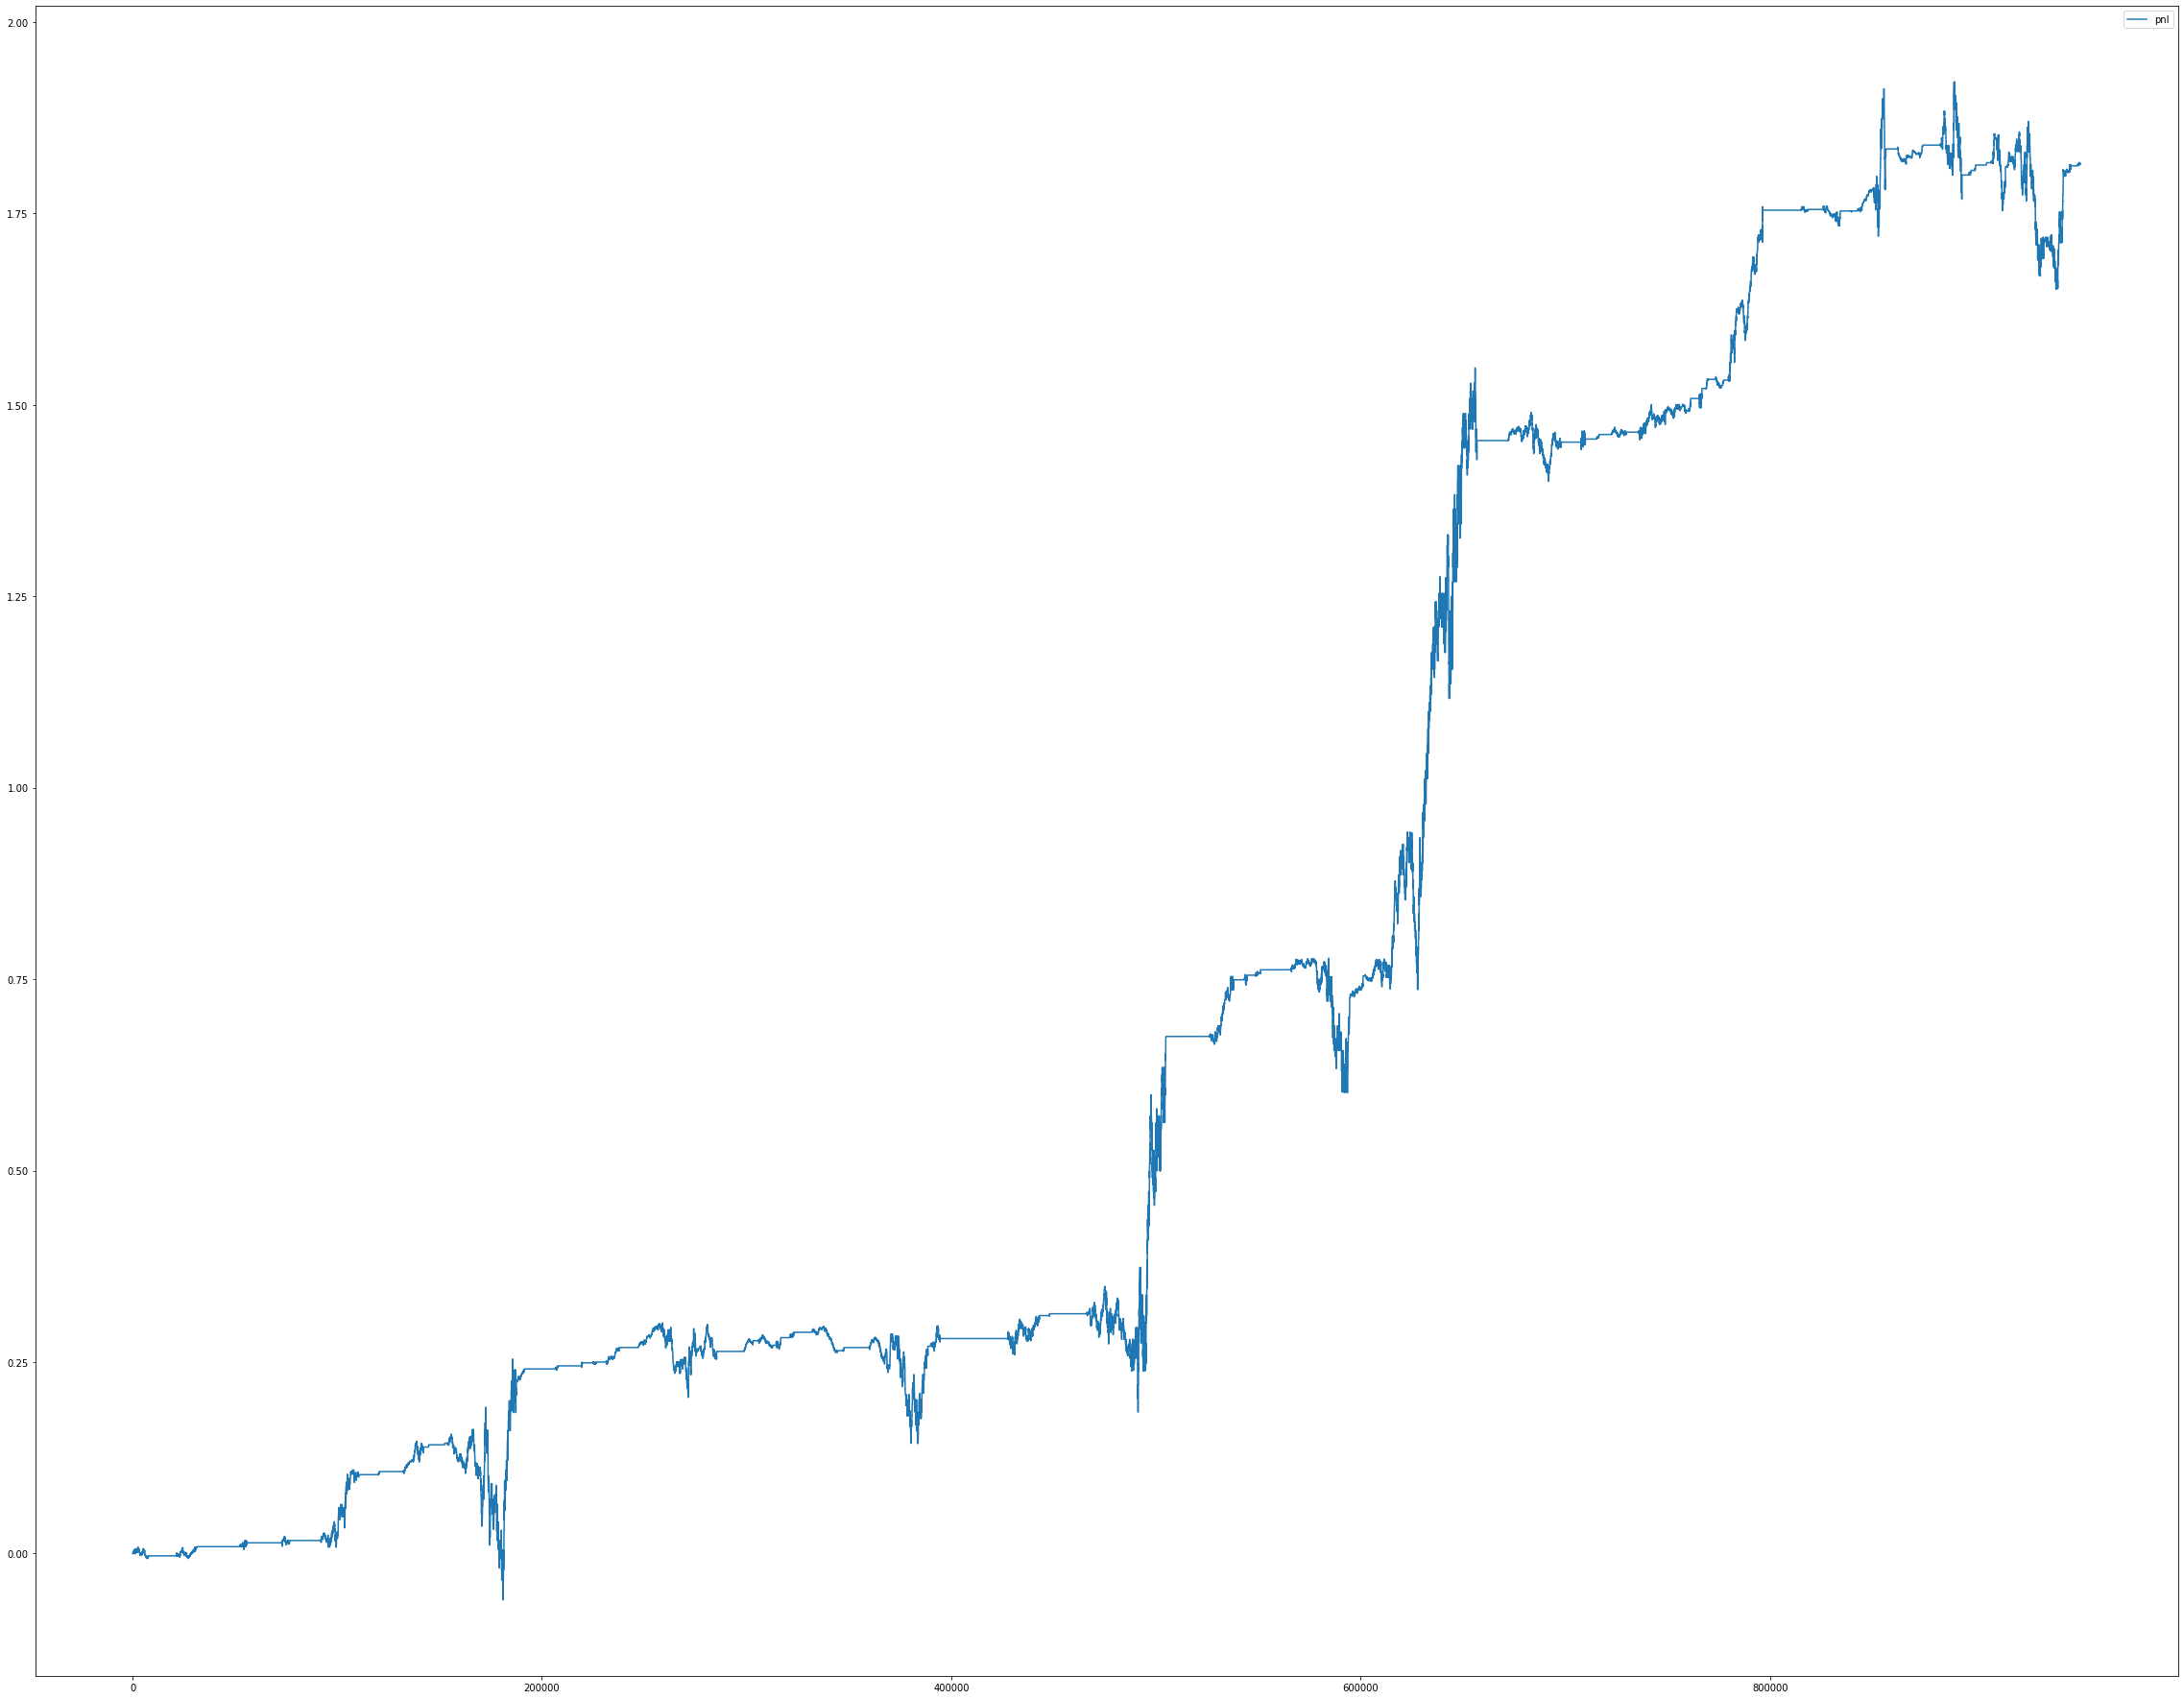

In [310]:
df_raw[['pnl']].plot(figsize=(40, 32))

# plt.figure(figsize=(40, 32))
# plt.plot(df_raw.index, df_raw[['pnl']]*40)
# plt.plot(df_raw.index, df_raw[['position']])
# plt.plot(df_raw.index, df_raw[['bbid']]*500-1000)
# display(df_raw.iloc[700:801])

In [290]:
df_raw[((df_raw['exch_bids'].apply(lambda x: x[0]) - df_raw['bbid']).abs() > 0.0029) & (df_raw['pos_change'] != 0)] #).mean()
# df_raw


,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price,balance,tot_volume,position,exch_bids,exch_asks,exch_bids1,exch_asks1,pnl,pos_change,round_time,mid,past_3m_range
85508,2025-04-08 02:11:48.962400000,2.156,2.157,NaN,NaN,Buy,0.1,2.160,0.2330,46.7870,-0.1,"(2.153, 0)","(2.16, 0)","(2.153, 0.0)","(2.16, 0.9)",0.01735,1,2025-04-08 02:11:49,2.1565,0.016
427649,2025-04-08 11:56:49.906199808,2.142,2.143,NaN,NaN,Buy,2.4,2.143,2.4727,367.8281,-1.0,"(2.1380000000000003, 0)","(2.143, 0)","(2.1380000000000003, 0.0)","(2.143, 0)",0.33020,1,2025-04-08 11:56:50,2.1425,0.010
504745,2025-04-08 13:46:16.457900032,2.114,2.115,NaN,NaN,Buy,0.1,2.116,0.8457,415.8299,-0.1,"(2.111, 0)","(2.1159999999999997, 0)","(2.111, 0.0)","(2.1159999999999997, 0.9)",0.63425,1,2025-04-08 13:46:16,2.1145,0.011
533980,2025-04-08 14:25:13.405600000,2.097,2.098,NaN,NaN,Buy,3095.0,2.097,2.8071,430.3613,-1.0,"(2.09, 0)","(2.097, 0)","(2.09, 0.0)","(2.097, 0)",0.70960,1,2025-04-08 14:25:13,2.0975,0.028
550783,2025-04-08 14:42:35.955200000,2.081,2.082,NaN,NaN,Buy,536.2,2.082,2.8301,480.5843,-1.0,"(2.0770000000000004, 0)","(2.082, 0)","(2.0770000000000004, 0.0)","(2.082, 0)",0.74860,1,2025-04-08 14:42:36,2.0815,0.009
565829,2025-04-08 15:02:17.009600000,2.069,2.070,NaN,NaN,Buy,0.2,2.070,1.1661,487.2403,-0.2,"(2.0650000000000004, 0)","(2.07, 0)","(2.0650000000000004, 0.0)","(2.07, 0.8)",0.75220,1,2025-04-08 15:02:17,2.0695,0.012
707521,2025-04-08 18:00:09.130000128,1.943,1.944,NaN,NaN,Buy,227.9,1.944,3.3481,654.9443,-1.0,"(1.939, 0)","(1.944, 0)","(1.939, 0.0)","(1.944, 0)",1.40460,1,2025-04-08 18:00:09,1.9435,0.011
714216,2025-04-08 18:04:46.496499968,1.925,1.926,NaN,NaN,Buy,203.4,1.929,3.3371,666.6093,-1.0,"(1.9220000000000002, 0)","(1.9289999999999998, 0)","(1.9220000000000002, 0.0)","(1.9289999999999998, 0)",1.41160,1,2025-04-08 18:04:46,1.9255,0.024
735806,2025-04-08 18:30:02.071500032,1.923,1.924,NaN,NaN,Buy,2058.1,1.925,3.3441,682.0123,-1.0,"(1.92, 0)","(1.925, 0)","(1.92, 0.0)","(1.925, 0)",1.42060,1,2025-04-08 18:30:02,1.9235,0.008
796049,2025-04-08 19:50:00.219700224,1.886,1.887,NaN,NaN,Buy,1125.0,1.888,1.6783,837.4673,0.0,"(1.883, 0)","(1.886, 0)","(1.883, 1)","(1.888, 0.0)",1.67830,1,2025-04-08 19:50:00,1.8865,0.007


In [296]:
dt = datetime(2025, 4, 8, 2, 11, 48)

# Convert to Unix time (seconds since epoch)
unix_time = dt.timestamp()
unix_time

1744092708.0

In [8]:
df = pd.DataFrame(index=df_raw.index)
df['cum_buy_side'] = df_raw[df_raw['trade_side'] == 'Buy']['trade_size']
df['cum_sell_side'] = df_raw[df_raw['trade_side'] == 'Sell']['trade_size']

df

,cum_buy_side,cum_sell_side
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
429775,NaN,NaN
429776,NaN,NaN
429777,NaN,NaN
429778,NaN,NaN


-11.0: 0.06%
-10.0: 0.01%
-9.0: 0.03%
-5.0: 0.00%
-4.0: 0.20%
-3.0: 0.06%
-2.0: 0.16%
-1.0: 1.59%
0.0: 76.45%
1.0: 14.86%
2.0: 1.56%
3.0: 1.64%
4.0: 0.49%
5.0: 2.13%
6.0: 0.11%
7.0: 0.17%
8.0: 0.03%
10.0: 0.08%
11.0: 0.00%
12.0: 0.00%
13.0: 0.01%
14.0: 0.16%
15.0: 0.20%


<ipython-input-7-8593925c43ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_buy['slip'] = round((trades_buy['trade_price'] - trades_buy['bask']) * 10000)


,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price,balance,tot_volume,position,exch_bids,exch_asks,exch_bids1,exch_asks1,pnl,pos_change,slip
29,2025-04-03 00:00:00.091800064,0.1094,0.1095,NaN,NaN,Buy,7309.0,0.1095,0.0000,0.000,0.0,"(0.1093, 0)","(0.1096, 0)","(0.1093, 500)","(0.1096, 500)",0.0000,0,0.0
30,2025-04-03 00:00:00.091800064,0.1094,0.1095,NaN,NaN,Buy,8250.0,0.1095,0.0000,0.000,0.0,"(0.1093, 0)","(0.1096, 0)","(0.1093, 500)","(0.1096, 500)",0.0000,0,0.0
31,2025-04-03 00:00:00.091800064,0.1094,0.1095,NaN,NaN,Buy,3674.0,0.1095,0.0000,0.000,0.0,"(0.1093, 0)","(0.1096, 0)","(0.1093, 500)","(0.1096, 500)",0.0000,0,0.0
32,2025-04-03 00:00:00.092000000,0.1094,0.1095,NaN,NaN,Buy,3179.0,0.1095,0.0000,0.000,0.0,"(0.1093, 0)","(0.1096, 0)","(0.1093, 500)","(0.1096, 500)",0.0000,0,0.0
33,2025-04-03 00:00:00.092000000,0.1094,0.1095,NaN,NaN,Buy,8492.0,0.1095,0.0000,0.000,0.0,"(0.1093, 0)","(0.1096, 0)","(0.1093, 500)","(0.1096, 500)",0.0000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400781,2025-04-03 23:59:07.874700032,0.1135,0.1136,NaN,NaN,Buy,1990.0,0.1136,-1.1122,44523.822,0.0,"(0.1134, 0.0)","(0.11370000000000001, 0)","(0.1134, 500)","(0.11370000000000001, 500.0)",-1.1122,0,0.0
400782,2025-04-03 23:59:07.874700032,0.1135,0.1136,NaN,NaN,Buy,155.0,0.1136,-1.1122,44523.822,0.0,"(0.1134, 0.0)","(0.11370000000000001, 0)","(0.1134, 500)","(0.11370000000000001, 500.0)",-1.1122,0,0.0
400783,2025-04-03 23:59:07.877600000,0.1135,0.1136,NaN,NaN,Buy,4365.0,0.1136,-1.1122,44523.822,0.0,"(0.1134, 0.0)","(0.11370000000000001, 0)","(0.1134, 500)","(0.11370000000000001, 500.0)",-1.1122,0,0.0
400881,2025-04-03 23:59:43.573299968,0.1135,0.1136,NaN,NaN,Buy,7713.0,0.1136,-1.1122,44523.822,0.0,"(0.1134, 0.0)","(0.11370000000000001, 0)","(0.1134, 500)","(0.11370000000000001, 500.0)",-1.1122,0,0.0


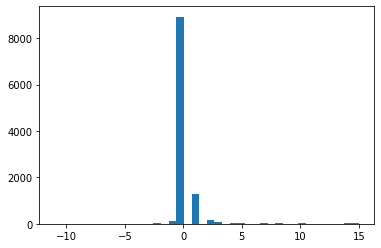

In [7]:
trades_buy = df_raw[df_raw['trade_side'] == 'Buy']

# plt.figure(figsize=(40, 32))
# plt.plot(trades_buy['time'], trades_buy['trade_size'].cumsum())


trades_buy['slip'] = round((trades_buy['trade_price'] - trades_buy['bask']) * 10000)

all_qty = trades_buy['trade_size'].sum()
for val in sorted(trades_buy['slip'].unique()):
    print(f"{val}: {trades_buy[trades_buy['slip'] == val]['trade_size'].sum() / all_qty * 100.0:.2f}%")

trades_buy

plt.hist(trades_buy['slip'], bins=40)
trades_buy

In [71]:
# big_trades = trades_buy[trades_buy['trade_size'] > 50]
df_raw = pd.read_csv("../simulation_data/output_2025-04-08_20250401_USUALUSDTOB500_USUALUSDTtrades_PL.csv")
df_raw['time'] = pd.to_datetime(df_raw['time'], unit='s')

df_buy = df_raw[df_raw['trade_side'] == 'Buy'].groupby('time', as_index=False).agg(
    trade_size_sum=('trade_size', 'sum'),
    trade_price_min=('trade_price', 'min'),
    trade_price_max=('trade_price', 'max')
)
df_buy.set_index('time', inplace=True)

df_buy_resampled = df_buy.resample('1T').agg({
        'trade_size_sum': 'sum',  # Sum for size
        'trade_price_min': 'min',  # Min for min price
        'trade_price_max': 'max'   # Max for max price
    }).rename(columns={'trade_size_sum': 'buy_size', 'trade_price_min': 'buy_price_min',  'trade_price_max': 'buy_price_max'})


# plt.figure(figsize=(40,32))
# plt.hist(df_buy[df_buy['trade_size_sum'] > 500]['time'].diff().dt.total_seconds(), bins=300)

df_buy_resampled

,buy_size,buy_price_min,buy_price_max
time,,,
2025-04-01 00:01:00,2847.0,0.1220,0.1221
2025-04-01 00:02:00,1500.0,0.1221,0.1221
2025-04-01 00:03:00,17335.0,0.1222,0.1226
2025-04-01 00:04:00,4227.0,0.1226,0.1226
2025-04-01 00:05:00,7497.0,0.1226,0.1227
...,...,...,...
2025-04-01 23:54:00,0.0,NaN,NaN
2025-04-01 23:55:00,11637.0,0.1197,0.1198
2025-04-01 23:56:00,0.0,NaN,NaN


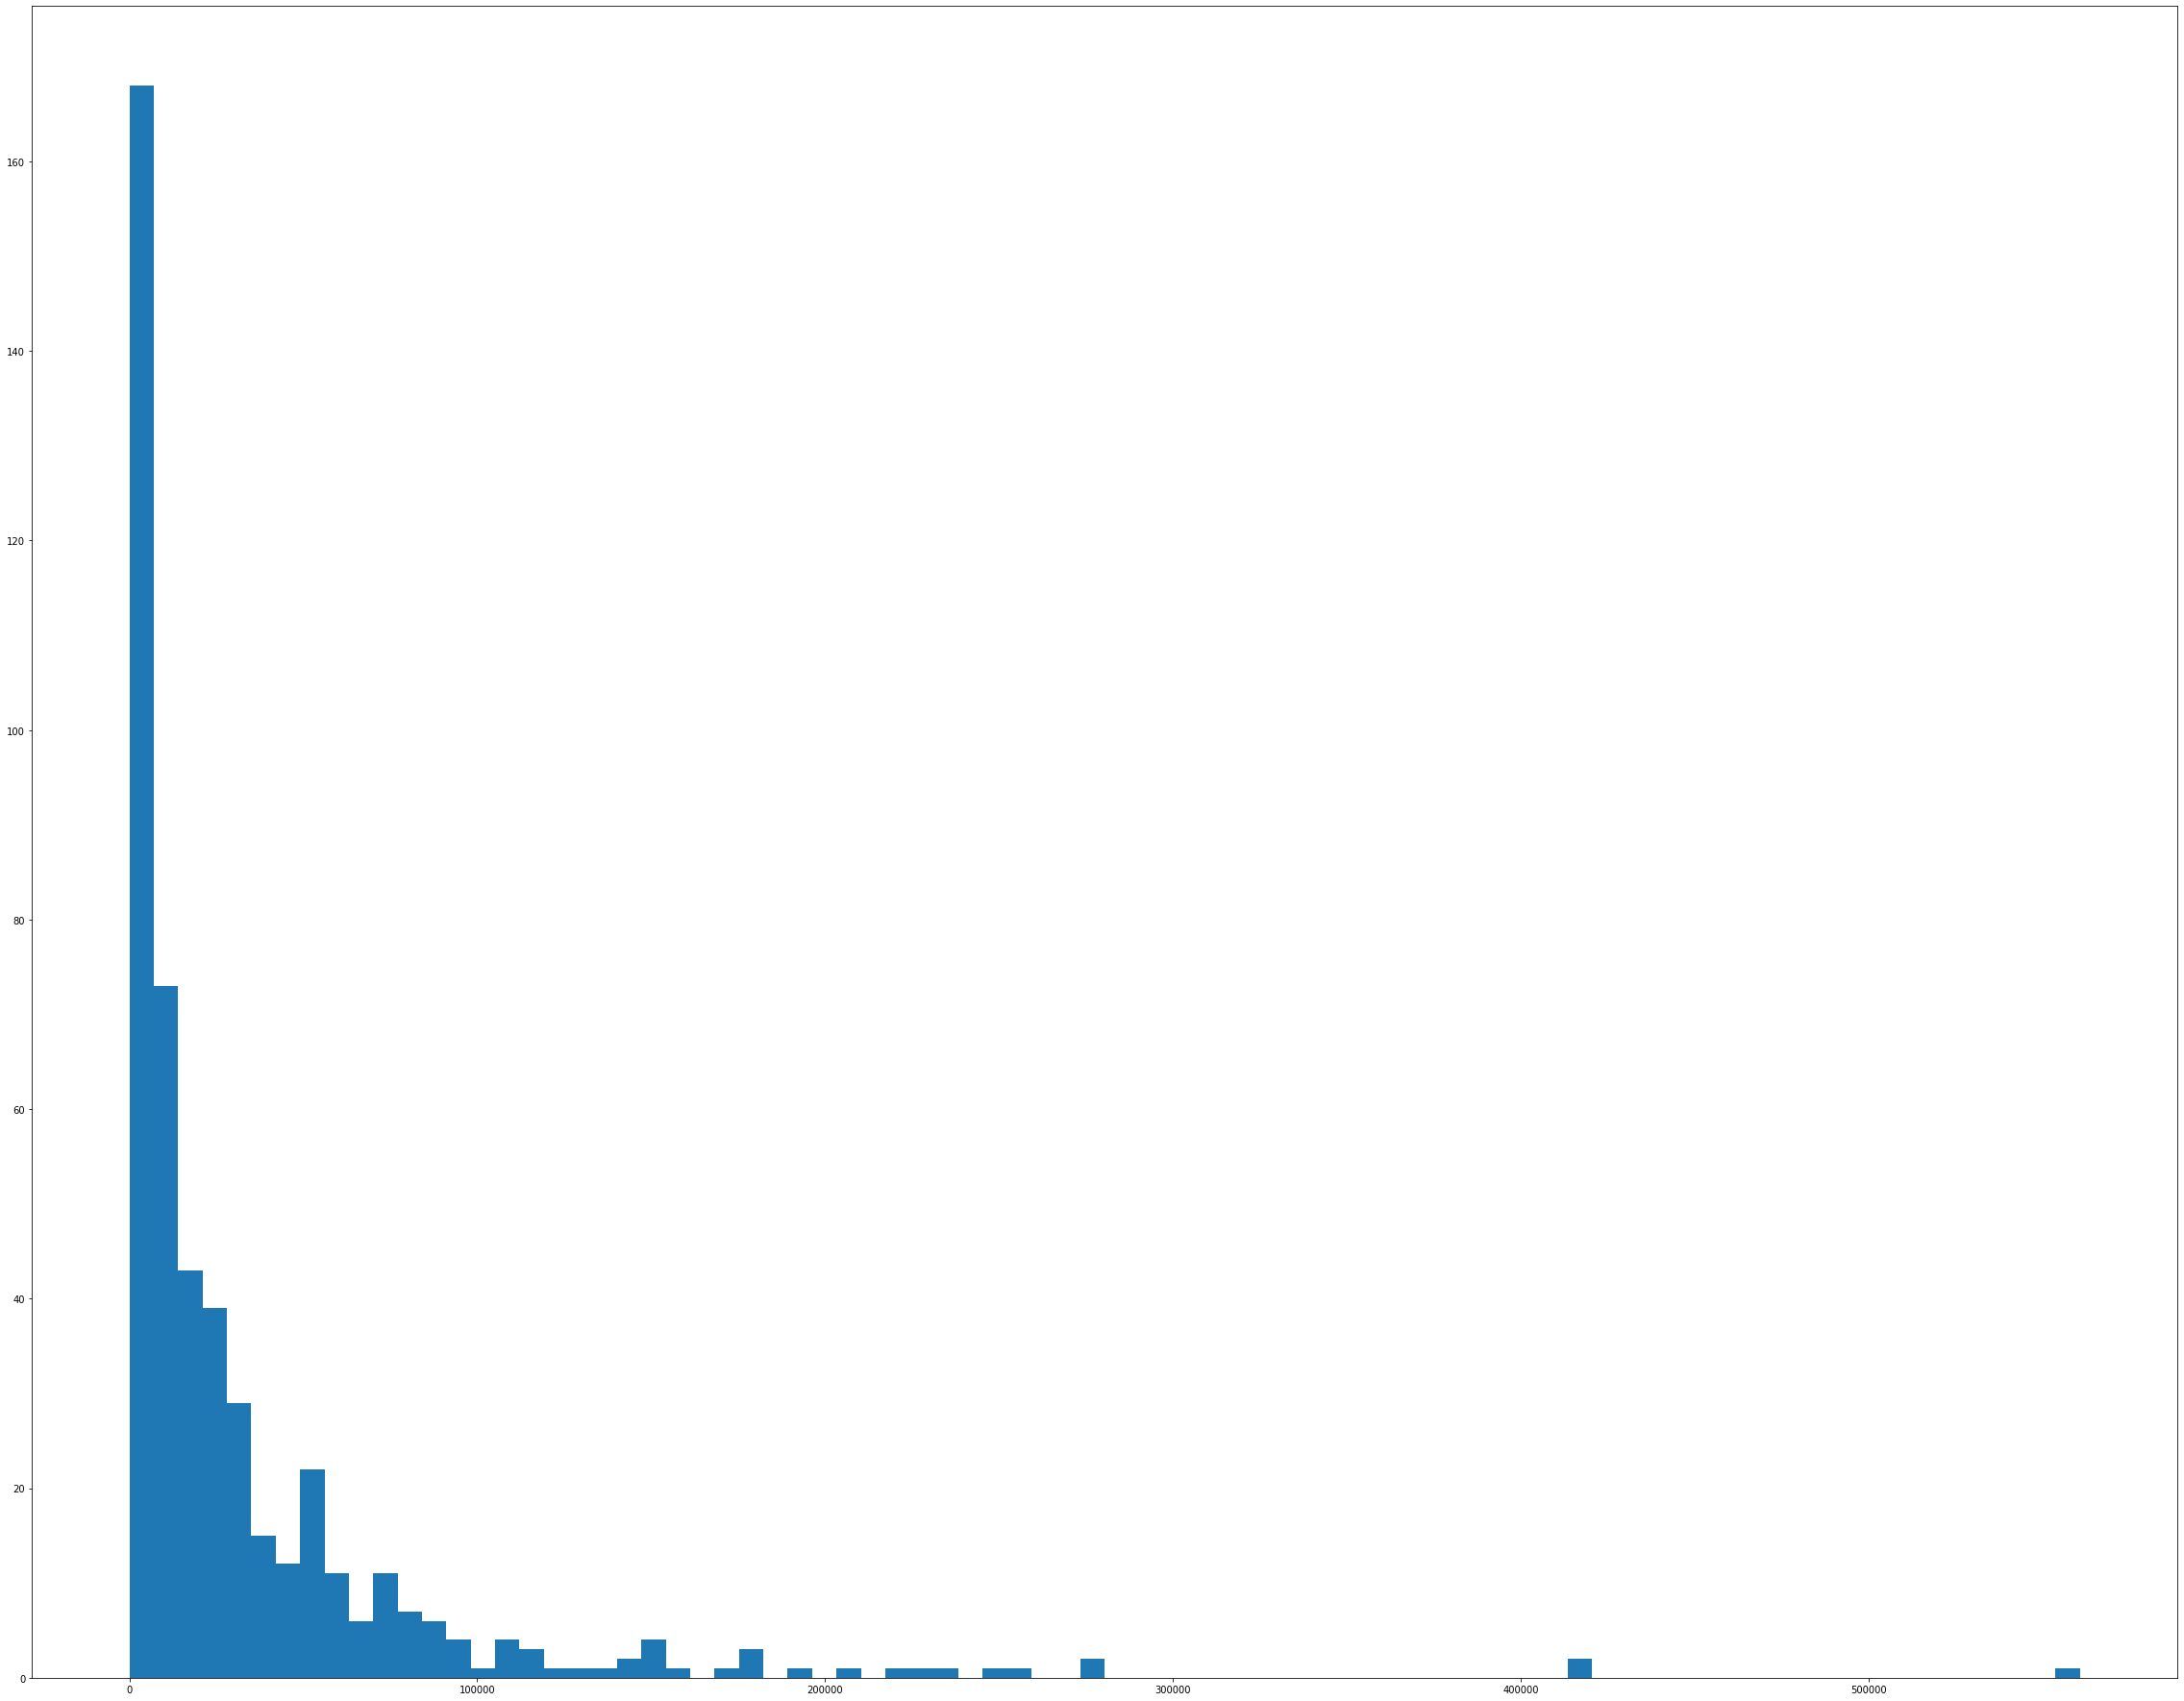

In [59]:
plt.figure(figsize=(40,32))
plt.hist(df_buy_resampled[(df_buy_resampled['buy_size'] < 10000000) & (df_buy_resampled['buy_size'] > -1)]['buy_size'],bins=80)
plt.show()

In [66]:
(df_buy_resampled['buy_size'] > 1000).sum() / df_buy_resampled['buy_size'].count()

0.5090403337969402

<BarContainer object of 3285 artists>

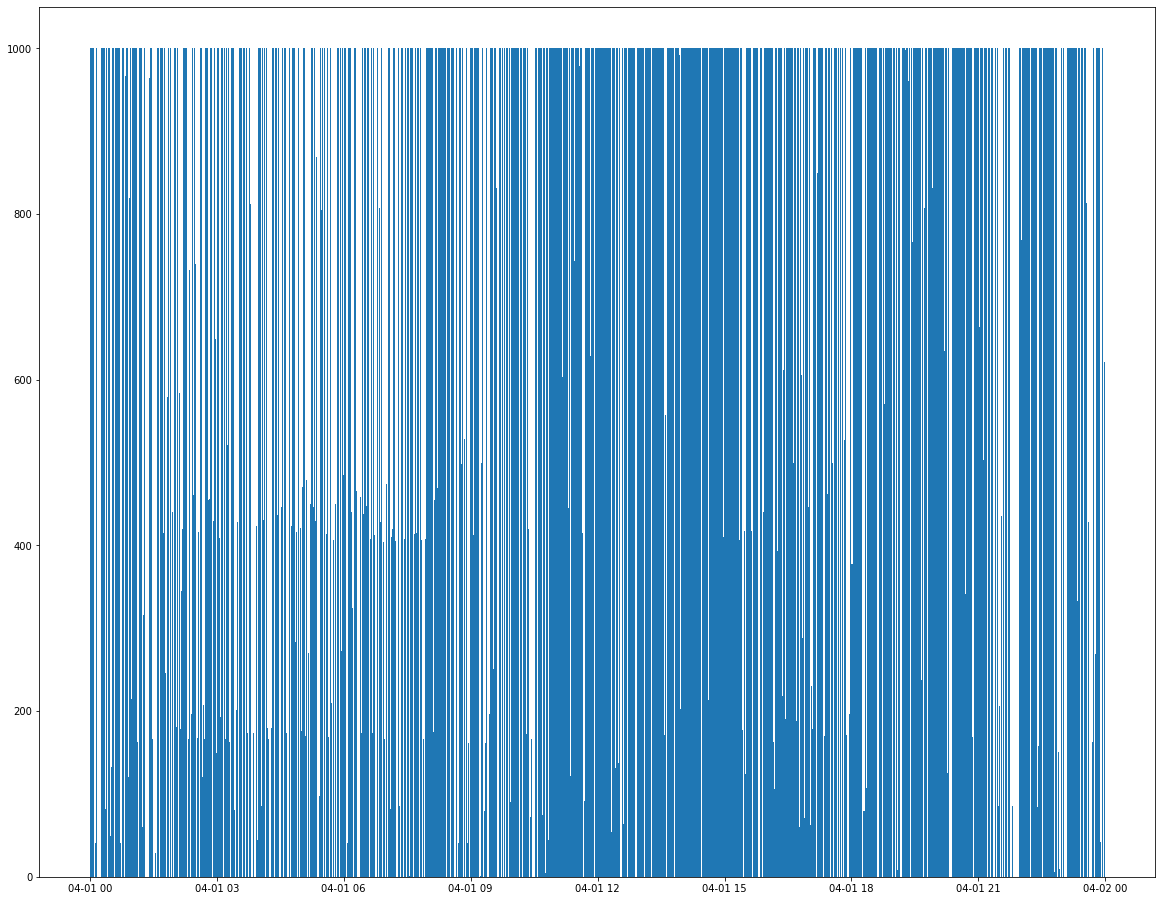

In [79]:
plt.figure(figsize=(20, 16))
plt.bar(df_buy.index, df_buy['trade_size_sum'].clip(upper=1000),width=0.001)

In [75]:
df_buy

,trade_size_sum,trade_price_min,trade_price_max
time,,,
2025-04-01 00:01:02.430400000,2048.0,0.1220,0.1220
2025-04-01 00:01:34.576100096,668.0,0.1220,0.1220
2025-04-01 00:01:37.651900160,131.0,0.1221,0.1221
2025-04-01 00:02:25.573499904,1500.0,0.1221,0.1221
2025-04-01 00:03:15.159600128,795.0,0.1222,0.1222
...,...,...,...
2025-04-01 23:55:18.494899968,1694.0,0.1197,0.1197
2025-04-01 23:55:18.497700096,1869.0,0.1197,0.1197
2025-04-01 23:55:33.512200192,4490.0,0.1198,0.1198


,symbol,volume,ticksize,price,spread
115,POPCATUSDT,109410495,0.00010,0.19270,5.189414
125,NEARUSDT,73031911,0.00100,2.04300,4.894763
55,AI16ZUSDT,51075351,0.00010,0.13110,7.627765
166,TIAUSDT,36505076,0.00100,2.48400,4.025765
68,GALAUSDT,34179763,0.00001,0.01420,7.042254
27,LOOKSUSDT,31268923,0.00001,0.01090,9.174312
101,PARTIUSDT,28126399,0.00010,0.18160,5.506608
162,TUTUSDT,24293259,0.00001,0.02480,4.032258
143,SNTUSDT,20925672,0.00001,0.02227,4.490346
78,SEIUSDT,19381788,0.00010,0.15330,6.523157


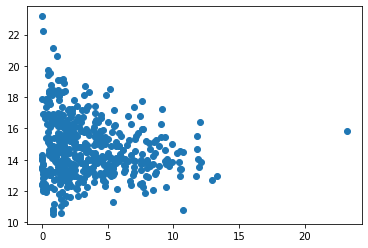

In [143]:
gdf = pd.read_csv('dataframes/symbol_info.csv')
plt.scatter(x=gdf['spread'], y=np.log(gdf['volume']))

gdf = gdf.sort_values(by='volume', ascending=False)
sdf = gdf[gdf['spread'] > 4]
sdf.head(10)

In [24]:
df_raw['trade_size'].sum() * df_raw['bbid'].mean()

1912708.5707642997

In [7]:
df_raw['round_time'] = df_raw['time'].dt.round('S')
df_raw

,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price,round_time
0,2025-04-08 00:00:00.428999936,2.116,2.117,847.3,7163.6,NaN,NaN,NaN,2025-04-08 00:00:00
1,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,75.0,2.117,2025-04-08 00:00:01
2,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,183.6,2.117,2025-04-08 00:00:01
3,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,672.6,2.117,2025-04-08 00:00:01
4,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,1811.1,2.117,2025-04-08 00:00:01
...,...,...,...,...,...,...,...,...,...
951587,2025-04-09 00:00:01.092999936,1.905,1.906,4798.5,11688.8,NaN,NaN,NaN,2025-04-09 00:00:01
951588,2025-04-09 00:00:01.193000192,1.905,1.906,4798.5,11831.3,NaN,NaN,NaN,2025-04-09 00:00:01
951589,2025-04-09 00:00:01.292999936,1.905,1.906,5923.5,6322.7,NaN,NaN,NaN,2025-04-09 00:00:01
951590,2025-04-09 00:00:01.394000128,1.905,1.906,5923.5,7293.6,NaN,NaN,NaN,2025-04-09 00:00:01


In [10]:
rdf = df_raw.set_index('time', inplace=False).resample('1S').last()
rdf['mid'] = (rdf['bbid'] + rdf['bask']) / 2
rdf['future_1m_mid'] = rdf['mid'].shift(-60)
rdf['future_1m_return'] = np.log(rdf['mid'].shift(-60)/rdf['mid'])
rdf['past_1m_return'] = np.log(rdf['mid']/rdf['mid'].shift(60))
rrdf = rdf[['future_1m_mid', 'future_1m_return', 'past_1m_return']].reset_index()
rrdf = rrdf.rename(columns={'time': 'r_time'})

df_raw_r = pd.merge(df_raw, rrdf, left_on='round_time', right_on='r_time', how='left') #.drop(columns=['r_time'])
df_raw_r


,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price,round_time,r_time,future_1m_mid,future_1m_return,past_1m_return
0,2025-04-08 00:00:00.428999936,2.116,2.117,847.3,7163.6,NaN,NaN,NaN,2025-04-08 00:00:00,2025-04-08 00:00:00,2.1155,-0.000473,NaN
1,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,75.0,2.117,2025-04-08 00:00:01,2025-04-08 00:00:01,2.1145,-0.000945,NaN
2,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,183.6,2.117,2025-04-08 00:00:01,2025-04-08 00:00:01,2.1145,-0.000945,NaN
3,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,672.6,2.117,2025-04-08 00:00:01,2025-04-08 00:00:01,2.1145,-0.000945,NaN
4,2025-04-08 00:00:00.997600000,NaN,NaN,NaN,NaN,Buy,1811.1,2.117,2025-04-08 00:00:01,2025-04-08 00:00:01,2.1145,-0.000945,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951587,2025-04-09 00:00:01.092999936,1.905,1.906,4798.5,11688.8,NaN,NaN,NaN,2025-04-09 00:00:01,2025-04-09 00:00:01,NaN,NaN,0.0
951588,2025-04-09 00:00:01.193000192,1.905,1.906,4798.5,11831.3,NaN,NaN,NaN,2025-04-09 00:00:01,2025-04-09 00:00:01,NaN,NaN,0.0
951589,2025-04-09 00:00:01.292999936,1.905,1.906,5923.5,6322.7,NaN,NaN,NaN,2025-04-09 00:00:01,2025-04-09 00:00:01,NaN,NaN,0.0
951590,2025-04-09 00:00:01.394000128,1.905,1.906,5923.5,7293.6,NaN,NaN,NaN,2025-04-09 00:00:01,2025-04-09 00:00:01,NaN,NaN,0.0


In [85]:
df_raw_r.columns

Index(['time', 'bbid', 'bask', 'bsize', 'asize', 'trade_side', 'trade_size',
       'trade_price', 'balance', 'tot_volume', 'position', 'exch_bids',
       'exch_asks', 'exch_bids1', 'exch_asks1', 'pnl', 'pos_change',
       'round_time', 'r_time', 'future_1m_return'],
      dtype='object')

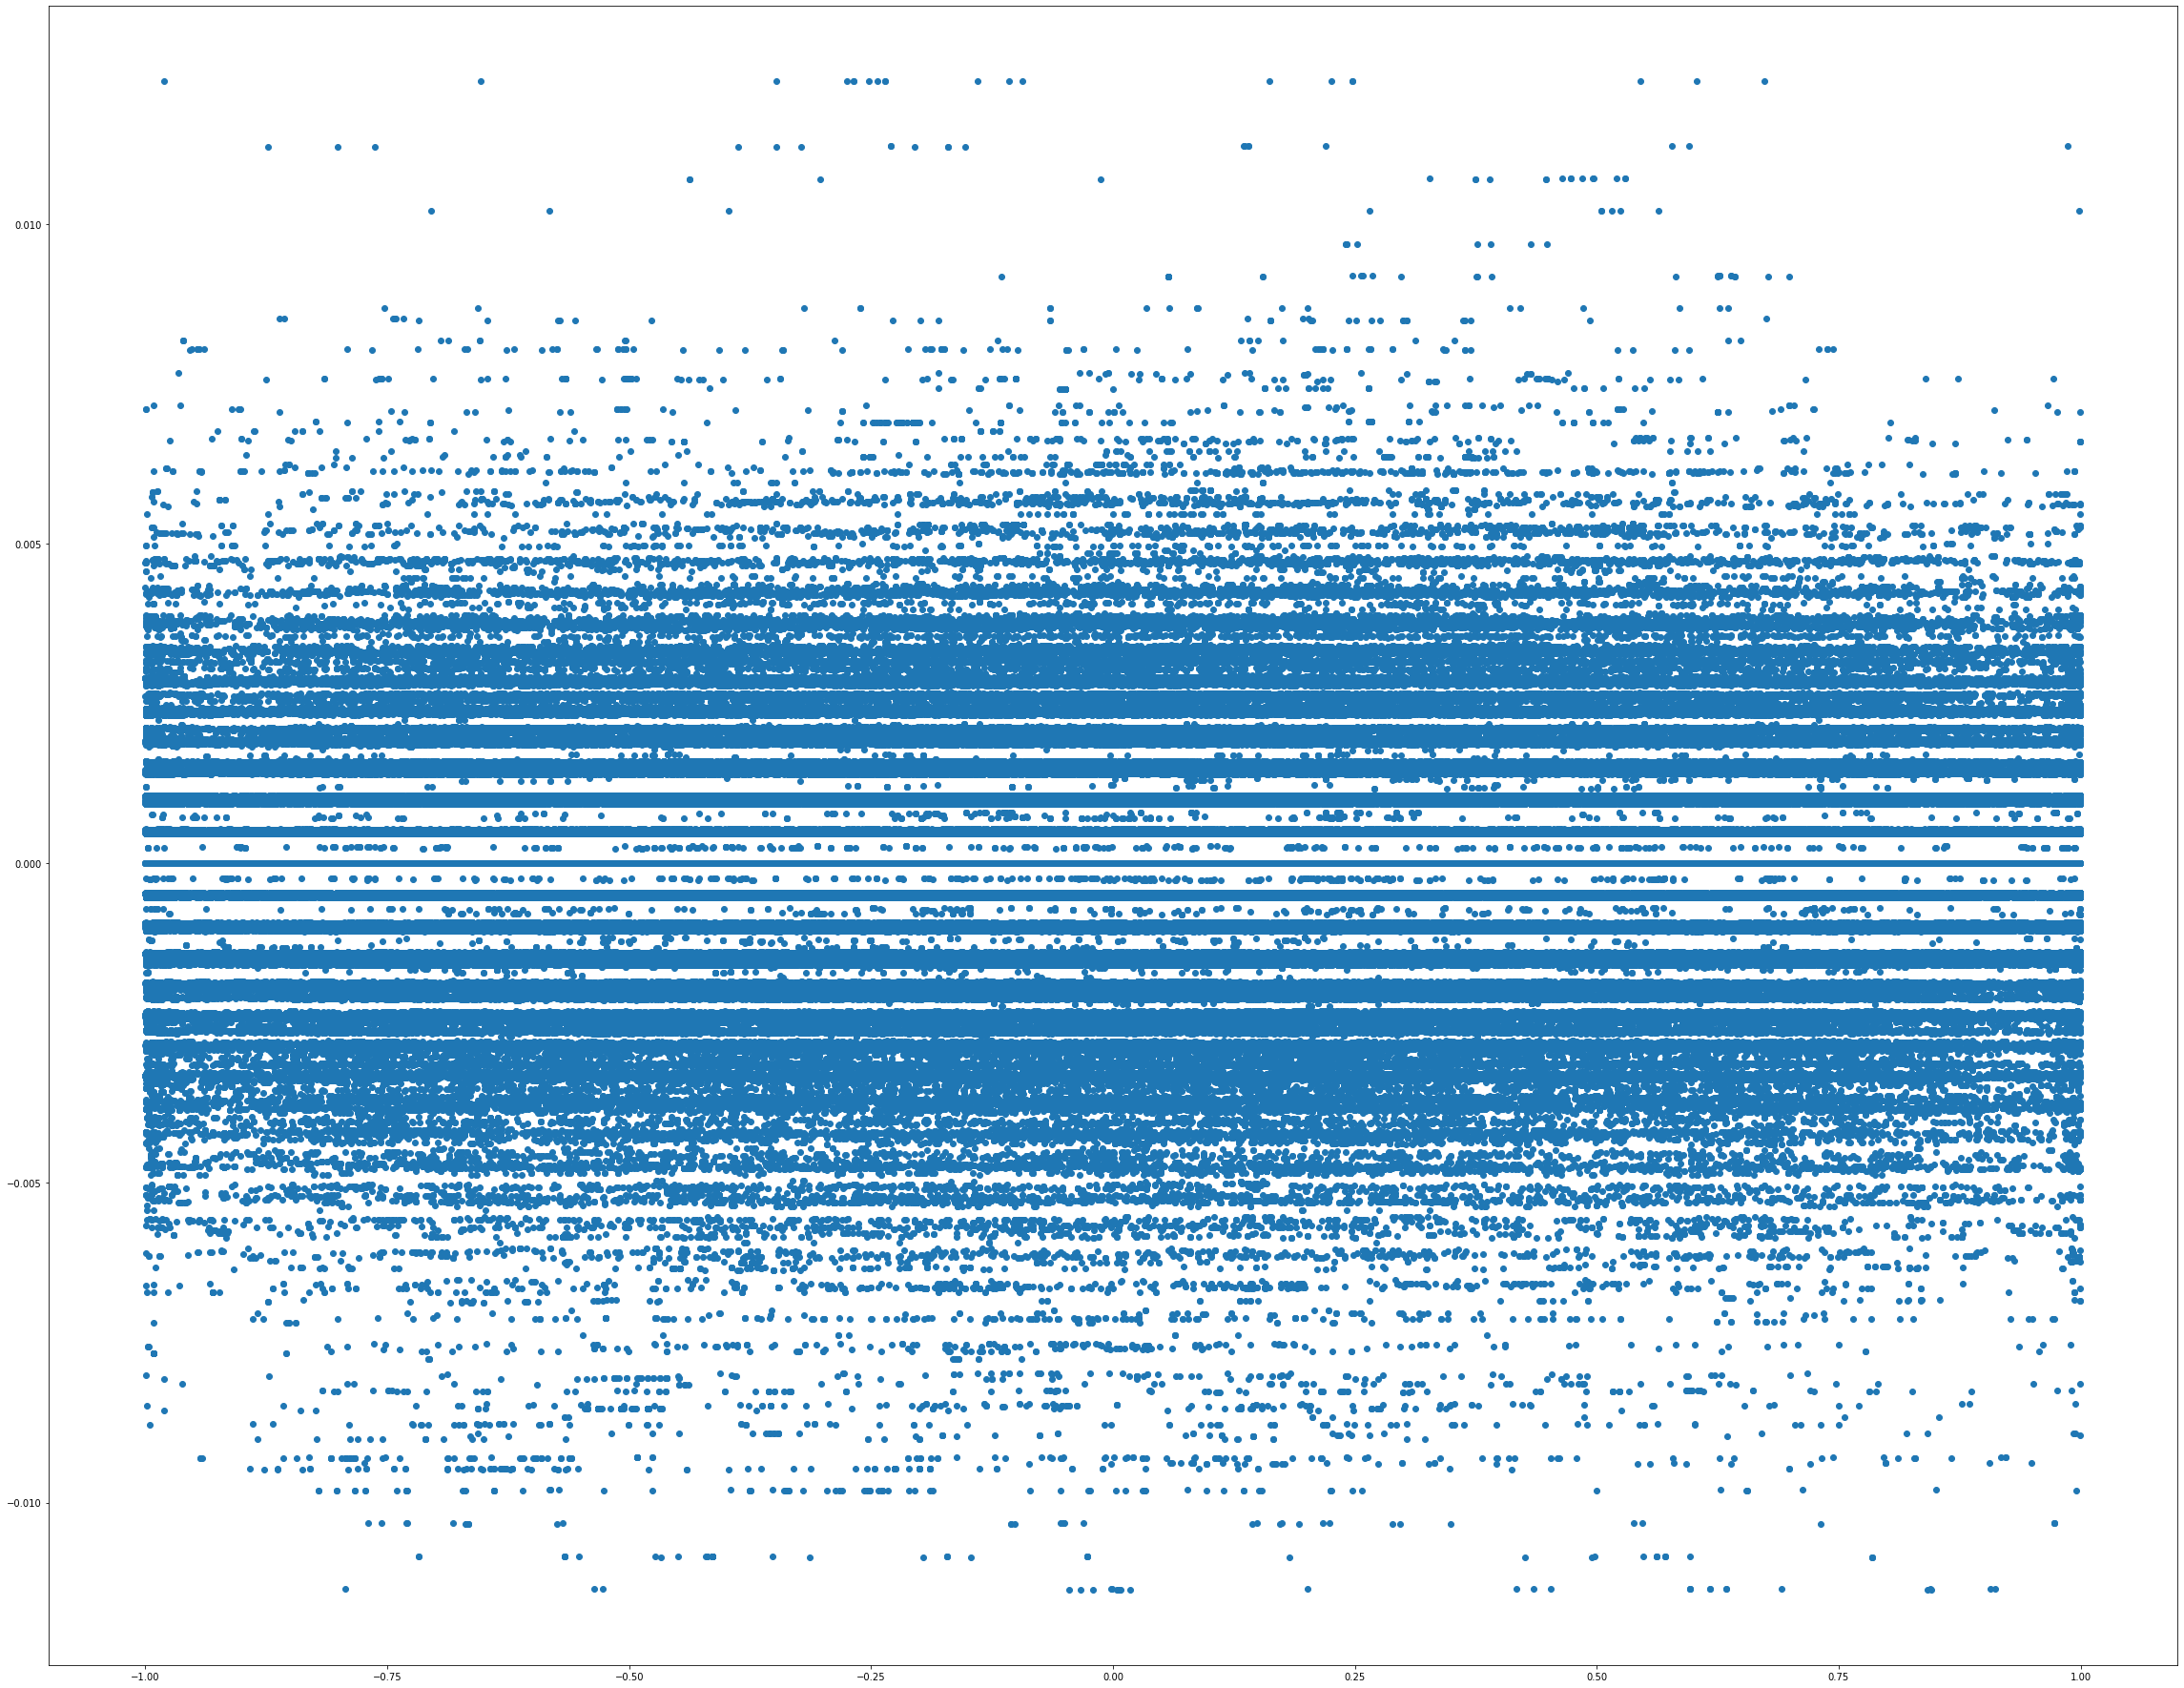

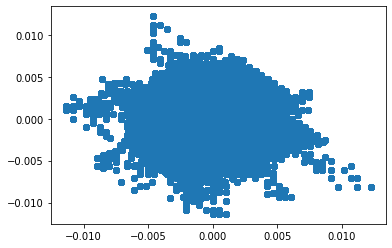

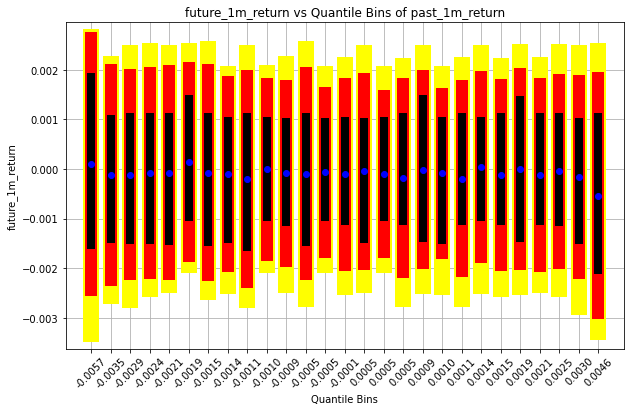

-0.03892288460364351
0.02938389466454793
Coefficients (slope): [ 0.000116   -0.01762283]
Intercept: -0.0000827

Feature Coefficients:
                Coefficient
ratio              0.000116
past_1m_return    -0.017623


In [15]:
df = df_raw_r.copy()
df['ratio'] = (df['bsize'] - df['asize']) / (df['bsize'] + df['asize'])
df['mid'] = (df['bbid'] + df['bask']) / 2

plt.figure(figsize=(40, 32))
plt.scatter(x=df['ratio'], y=df['future_1m_return'])
plt.show()

plt.scatter(x=df['past_1m_return'], y=df['future_1m_return'])
plt.show()

plot_box_plot_a(df, 'past_1m_return', 'future_1m_return')

print(df['past_1m_return'].corr(df['future_1m_return']))
print(df['ratio'].corr(df['future_1m_return']))

regr_df = df[['ratio', 'past_1m_return', 'future_1m_return']]
y_pred, y, X, clean_df = lin_regr(regr_df, 'future_1m_return')


# x_cols = ['ratio']
# plot_df = pd.DataFrame({'y': y, 'y_pred': y_pred})

# get_stats(y, y_pred)

# show_heat_map(df[x_cols + ['future_1m_return']])
# linearity_test(clean_df, x_cols, y)
# residual_independence_test(y, y_pred)
# homoscedasticity_test(y, y_pred)
# residual_normality_test(y, y_pred)
# multicollinearity_test(X)



(array([17902., 10632., 15532., 18337., 21286., 22359., 23258., 25187.,
        26499., 28753., 30863., 33042., 34459., 35619., 37552., 37308.,
        36540., 33892., 32525., 28521., 25920., 24270., 22748., 21778.,
        20348., 19950., 18533., 15008., 11286., 19930.]),
 array([0.99980921, 0.99981652, 0.99982384, 0.99983115, 0.99983846,
        0.99984577, 0.99985309, 0.9998604 , 0.99986771, 0.99987502,
        0.99988234, 0.99988965, 0.99989696, 0.99990428, 0.99991159,
        0.9999189 , 0.99992621, 0.99993353, 0.99994084, 0.99994815,
        0.99995546, 0.99996278, 0.99997009, 0.9999774 , 0.99998471,
        0.99999203, 0.99999934, 1.00000665, 1.00001396, 1.00002128,
        1.00002859]),
 <BarContainer object of 30 artists>)

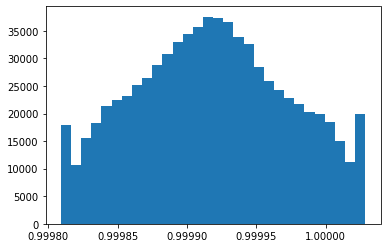

In [121]:
df['theo'] = df['mid'] * (1.0 + (df['ratio'] * 0.00010969 - 0.0000811))
# df[['theo', 'mid']].plot(figsize=(40, 32))

# plt.figure(figsize=(40, 32))
# plt.scatter(df['theo'], df['theo'] / df['mid'])

plt.hist(df['theo'] / df['mid'], bins=30)

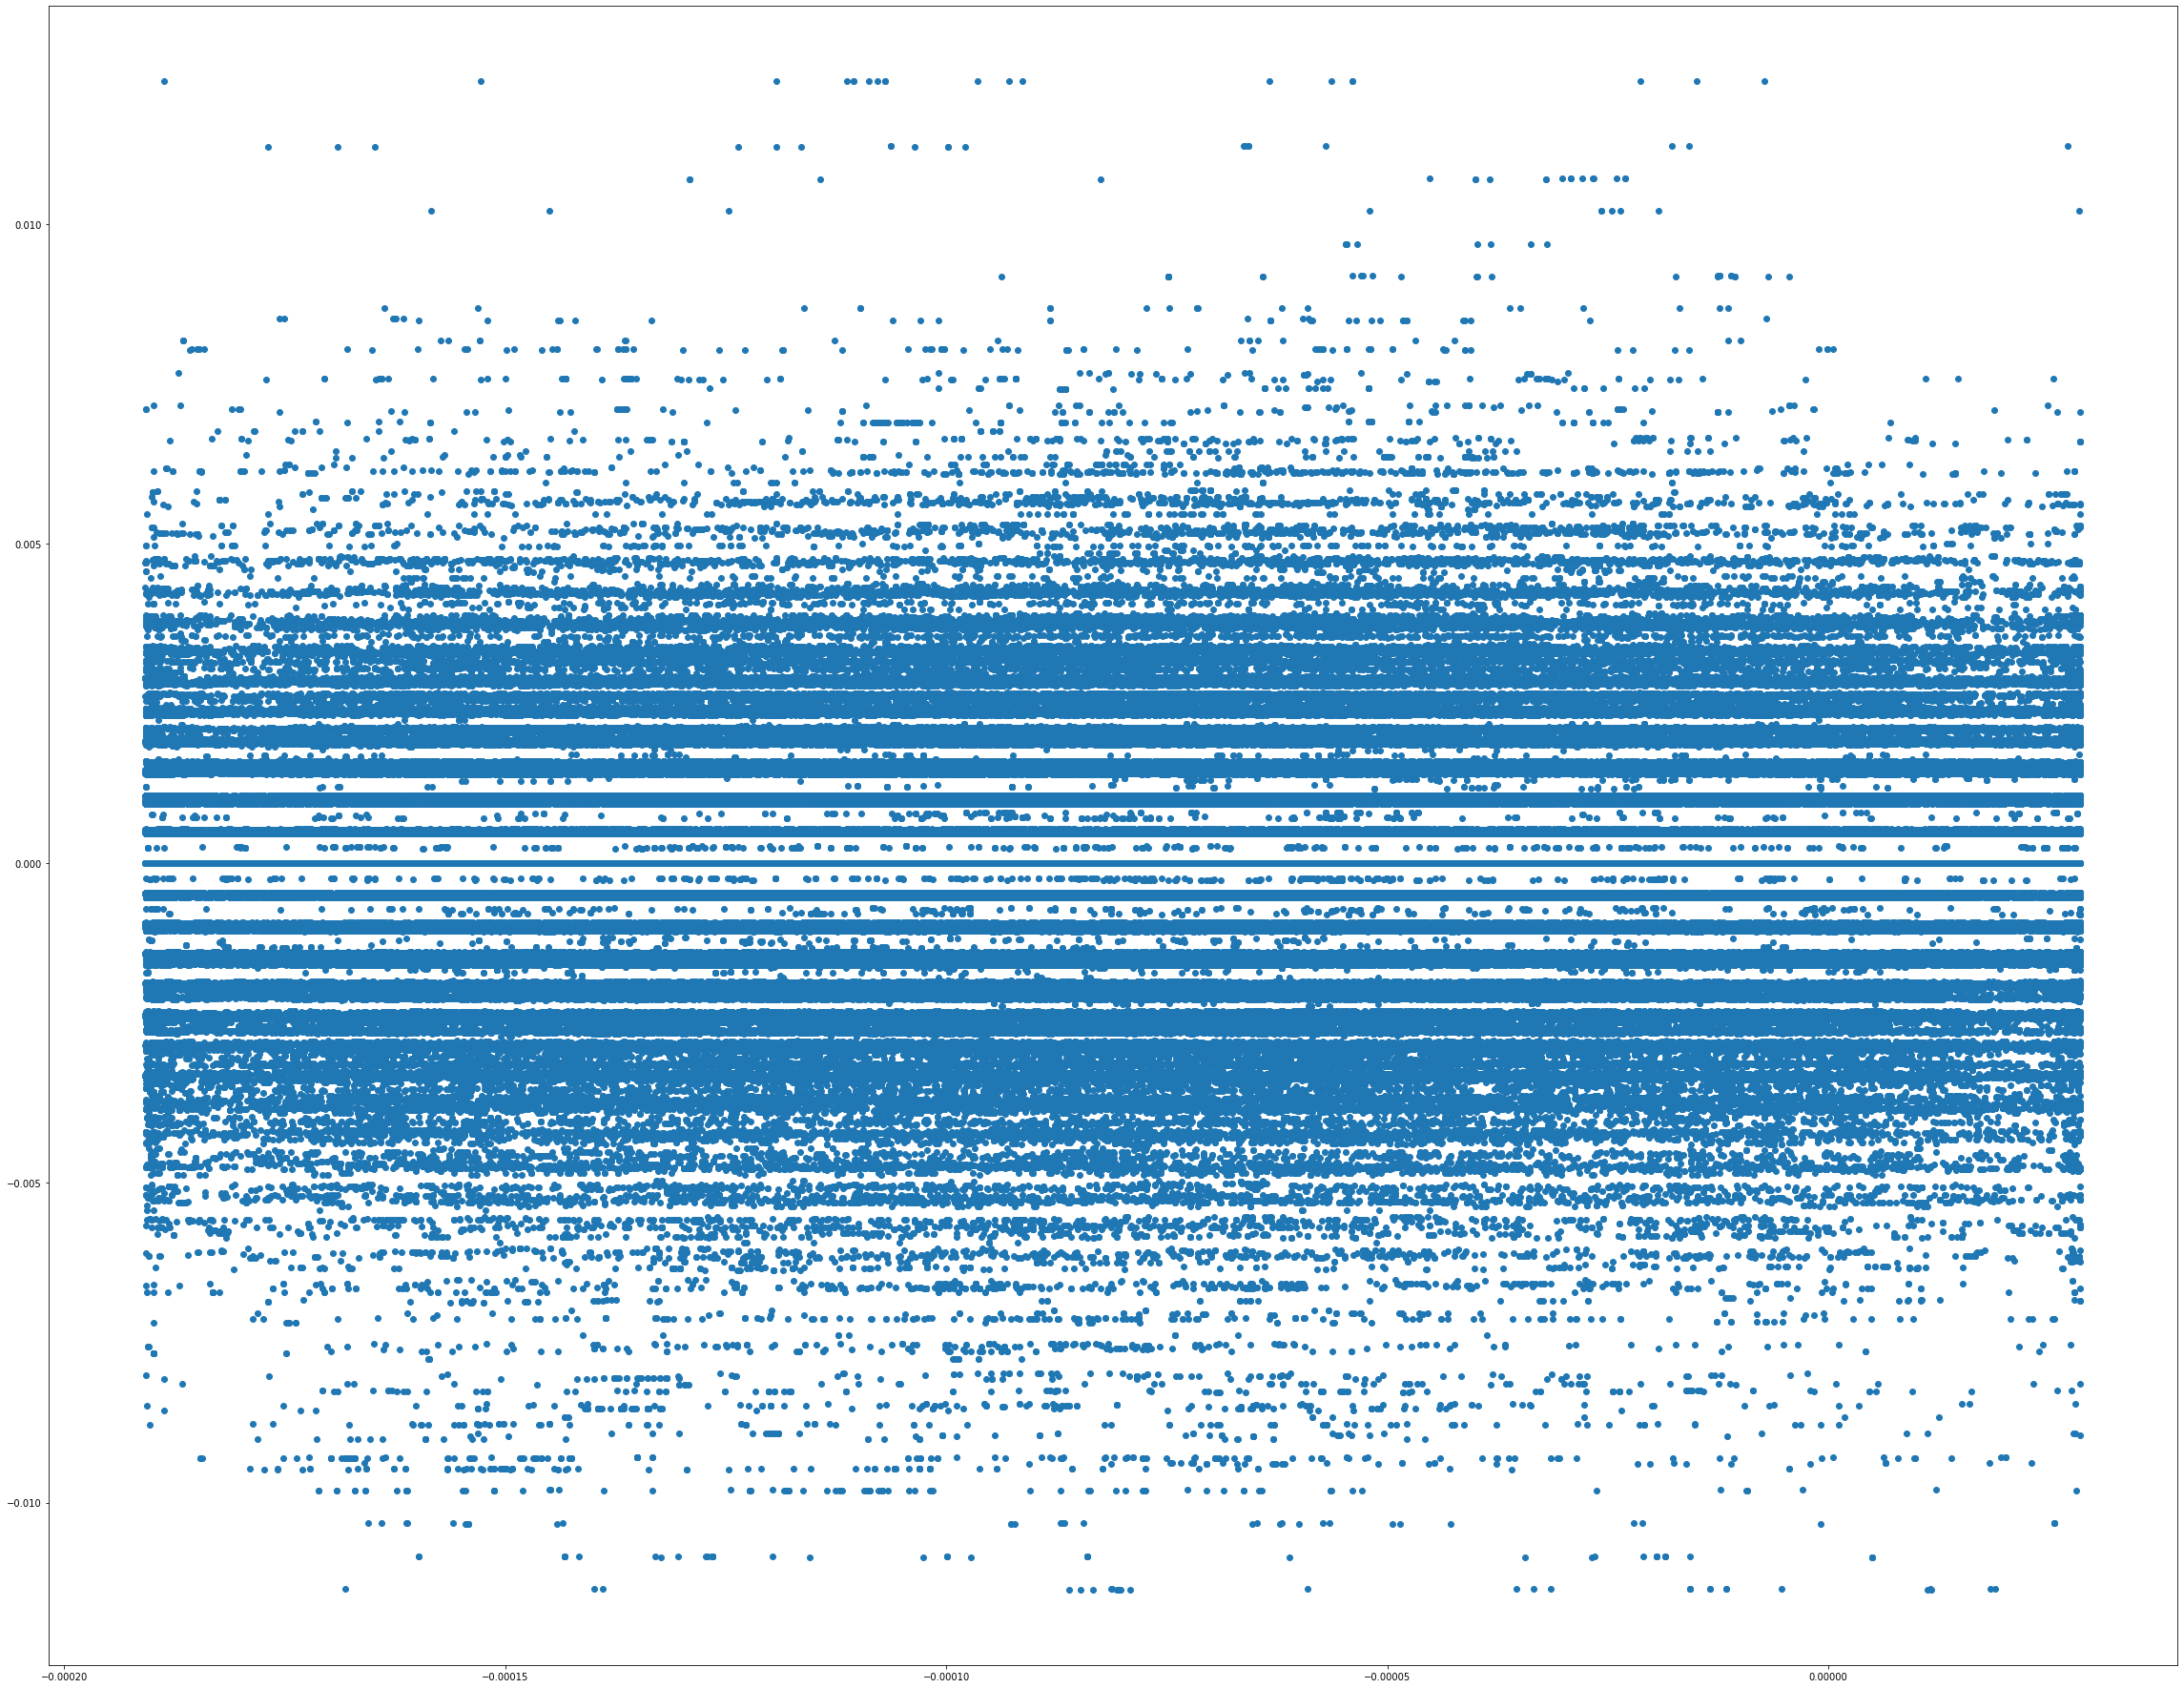

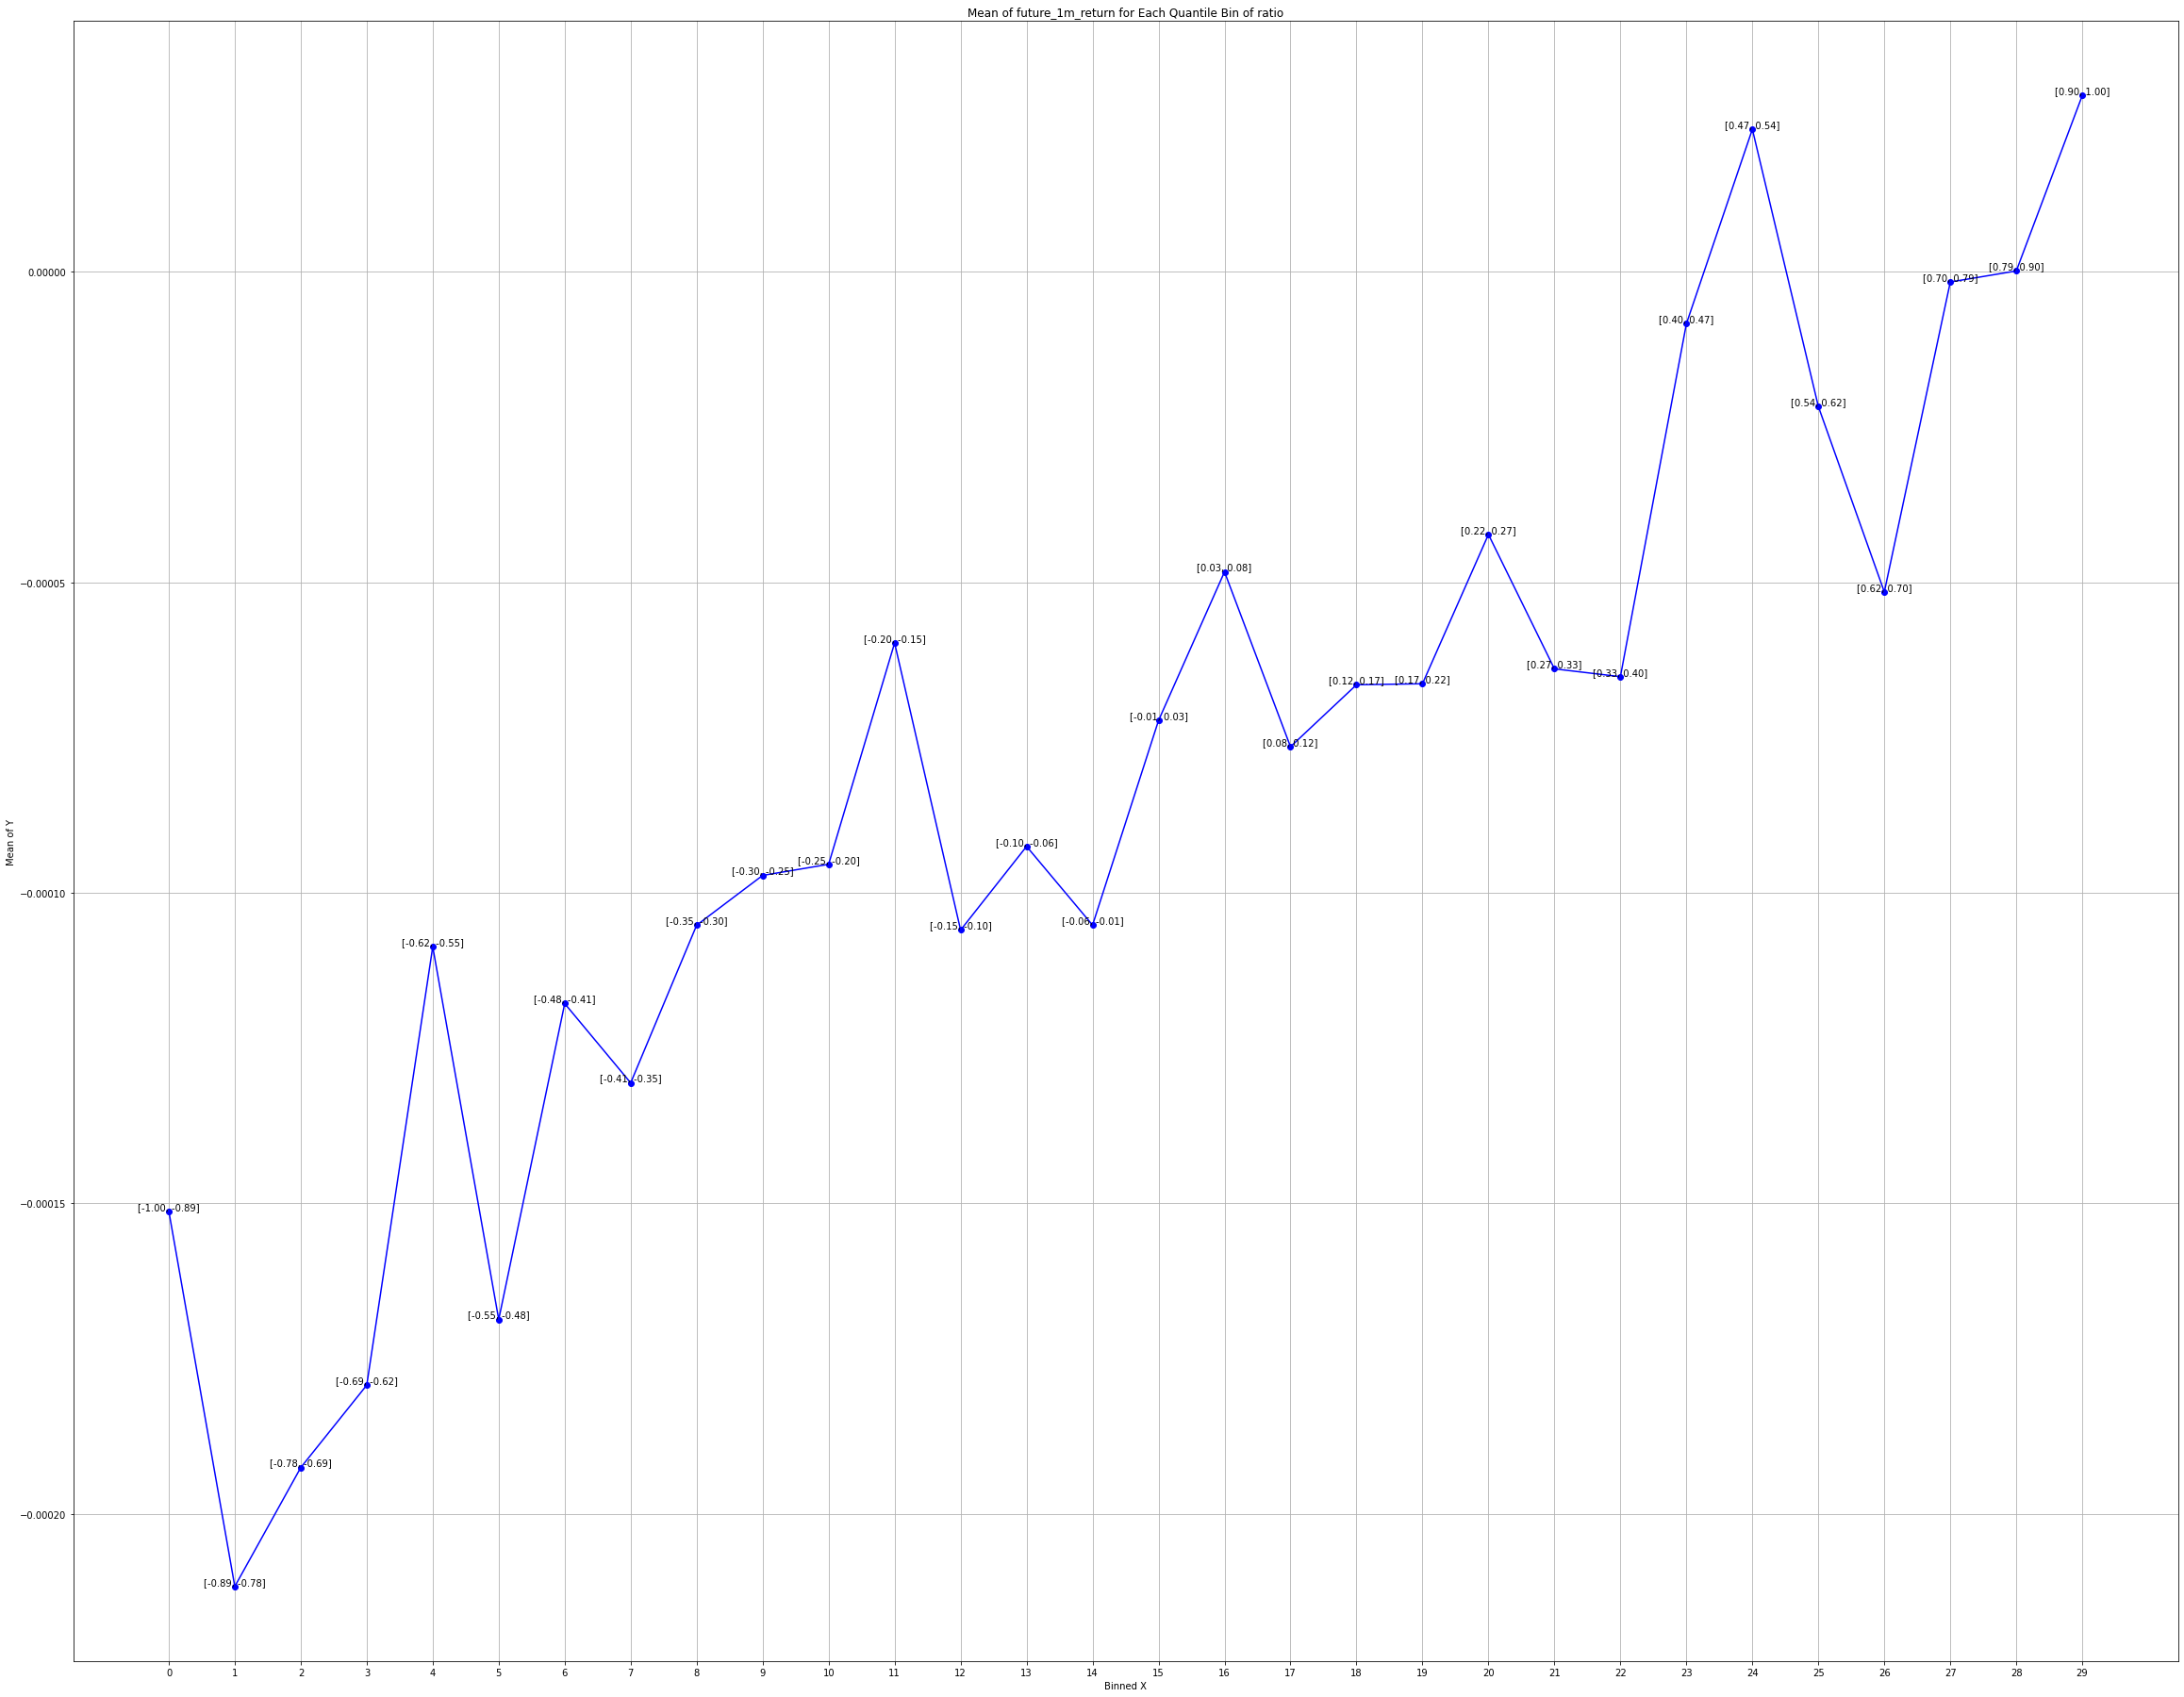

In [100]:
%reload_ext autoreload
plt.figure(figsize=(40, 32))
plt.scatter(x=df['ratio'] * 0.00010969 - 0.0000811, y=df['future_1m_return'])

plot_box_plot(df, 'ratio', 'future_1m_return')

In [127]:
(df['ratio'] < -0.3).mean()

0.23635654776416784

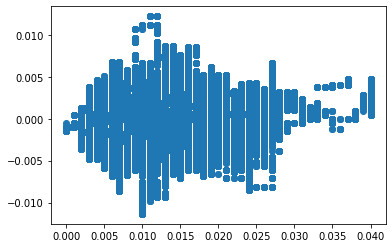

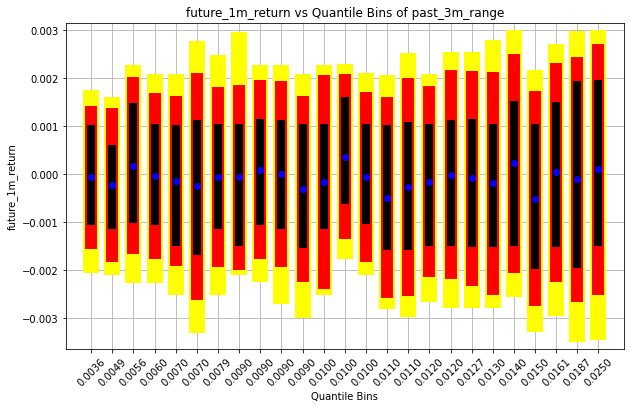

In [244]:
%reload_ext autoreload
# df['rolling_std'] = df['mid'].rolling('5T', on='index').std()
# df['mid']

# df.set_index('time', inplace=True)
df['past_5m_std'] = df['mid'].rolling('5T', on=df.index).std()
df['past_3m_range'] = df['mid'].rolling('3T', on=df.index).apply(lambda x: x.max() - x.min(), raw=True)
# plt.hist(df['mid'].rolling('5T', on=df.index).std())
df

plt.scatter(x=df['past_5m_range'], y=df['future_1m_return'])

# plot_box_plot(df, 'past_5m_range', 'future_1m_return')
plot_box_plot_a(df, 'past_3m_range', 'future_1m_return')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951592 entries, 0 to 951591
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              951592 non-null  datetime64[ns]
 1   bbid              951592 non-null  float64       
 2   bask              951592 non-null  float64       
 3   bsize             749837 non-null  float64       
 4   asize             749837 non-null  float64       
 5   trade_side        201755 non-null  object        
 6   trade_size        201755 non-null  float64       
 7   trade_price       201755 non-null  float64       
 8   balance           951592 non-null  float64       
 9   tot_volume        951592 non-null  float64       
 10  position          951592 non-null  float64       
 11  exch_bids         951592 non-null  object        
 12  exch_asks         951592 non-null  object        
 13  exch_bids1        951592 non-null  object        
 14  exch

In [324]:
df

,bbid,bask,bsize,asize,trade_side,trade_size,trade_price,balance,tot_volume,position,exch_bids,exch_asks,exch_bids1,exch_asks1,pnl,pos_change,round_time,r_time,future_1m_mid,future_1m_return,ratio,mid,theo,past_5m_std,past_1m_std,past_3m_std,past_5m_range,past_3m_range
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-04-08 00:00:00.428999936,2.116,2.117,847.3,7163.6,NaN,NaN,NaN,0.00000,0.000000e+00,0.0,"(None, 0)","(None, 0)","(None, 0)","(None, 0)",0.00000,1,2025-04-08 00:00:00,2025-04-08 00:00:00,2.1155,-0.000473,-0.788463,2.1165,2.116145,NaN,NaN,NaN,0.000,0.000
2025-04-08 00:00:00.997600000,2.116,2.117,NaN,NaN,Buy,75.0,2.117,0.00000,0.000000e+00,0.0,"(2.1159, 0)","(2.1171, 0)","(2.1159, 500)","(2.1171, 500)",0.00000,0,2025-04-08 00:00:01,2025-04-08 00:00:01,2.1145,-0.000945,NaN,2.1165,NaN,0.000000,0.000000,0.000000,0.000,0.000
2025-04-08 00:00:00.997600000,2.116,2.117,NaN,NaN,Buy,183.6,2.117,0.00000,0.000000e+00,0.0,"(2.1159, 0)","(2.1171, 0)","(2.1159, 500)","(2.1171, 500)",0.00000,0,2025-04-08 00:00:01,2025-04-08 00:00:01,2.1145,-0.000945,NaN,2.1165,NaN,0.000000,0.000000,0.000000,0.000,0.000
2025-04-08 00:00:00.997600000,2.116,2.117,NaN,NaN,Buy,672.6,2.117,0.00000,0.000000e+00,0.0,"(2.1159, 0)","(2.1171, 0)","(2.1159, 500)","(2.1171, 500)",0.00000,0,2025-04-08 00:00:01,2025-04-08 00:00:01,2.1145,-0.000945,NaN,2.1165,NaN,0.000000,0.000000,0.000000,0.000,0.000
2025-04-08 00:00:00.997600000,2.116,2.117,NaN,NaN,Buy,1811.1,2.117,0.00000,0.000000e+00,0.0,"(2.1159, 0)","(2.1171, 0)","(2.1159, 500)","(2.1171, 500)",0.00000,0,2025-04-08 00:00:01,2025-04-08 00:00:01,2.1145,-0.000945,NaN,2.1165,NaN,0.000000,0.000000,0.000000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09 00:00:01.092999936,1.905,1.906,4798.5,11688.8,NaN,NaN,NaN,-462.09618,2.266680e+06,0.0,"(1.9049, 0.0)","(1.9061, 0)","(1.9049, 500)","(1.9061, 500.0)",-462.09618,0,2025-04-09 00:00:01,2025-04-09 00:00:01,NaN,NaN,-0.417916,1.9055,1.905258,0.001139,0.001139,0.001139,0.005,0.005
2025-04-09 00:00:01.193000192,1.905,1.906,4798.5,11831.3,NaN,NaN,NaN,-462.09618,2.266680e+06,0.0,"(1.9049, 0.0)","(1.9061, 0)","(1.9049, 500)","(1.9061, 500.0)",-462.09618,0,2025-04-09 00:00:01,2025-04-09 00:00:01,NaN,NaN,-0.422903,1.9055,1.905257,0.001139,0.001139,0.001139,0.005,0.005
2025-04-09 00:00:01.292999936,1.905,1.906,5923.5,6322.7,NaN,NaN,NaN,-462.09618,2.266680e+06,0.0,"(1.9049, 0.0)","(1.9061, 0)","(1.9049, 500)","(1.9061, 500.0)",-462.09618,0,2025-04-09 00:00:01,2025-04-09 00:00:01,NaN,NaN,-0.032598,1.9055,1.905339,0.001139,0.001139,0.001139,0.005,0.005
